In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from pylab import rcParams

You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.


### Read the data as an appropriate Time Series data and plot the data.

In [3]:
#Read the data
df = pd.read_csv('Shoe-Sales.csv',parse_dates=True,index_col='YearMonth')
df.head()


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

In [4]:
date = pd.date_range(start='1/1/1980', end='1/7/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-03-31', '1994-04-30', '1994-05-31', '1994-06-30',
               '1994-07-31', '1994-08-31', '1994-09-30', '1994-10-31',
               '1994-11-30', '1994-12-31'],
              dtype='datetime64[ns]', length=180, freq='M')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [8]:
df.shape

(187, 1)

Data has one column and 187 rows

all numercial in nature.

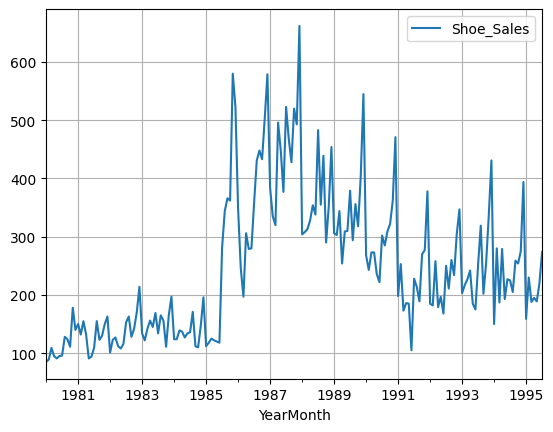

In [9]:
df.plot();
plt.grid()

Plot shows upwards trends form 1985 and again goes down in 1991 and remain statble post.

### Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Exploratory Data Analysis

In [10]:
df.describe().round(2).T

count    mean     std   min    25%    50%    75%    max
Shoe_Sales  187.0  245.64  121.39  85.0  143.5  220.0  315.5  662.0

Ploting a year on year boxplot for the Shoe Sales.

In [11]:
df.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995],
           dtype='int64', name='YearMonth', length=187)

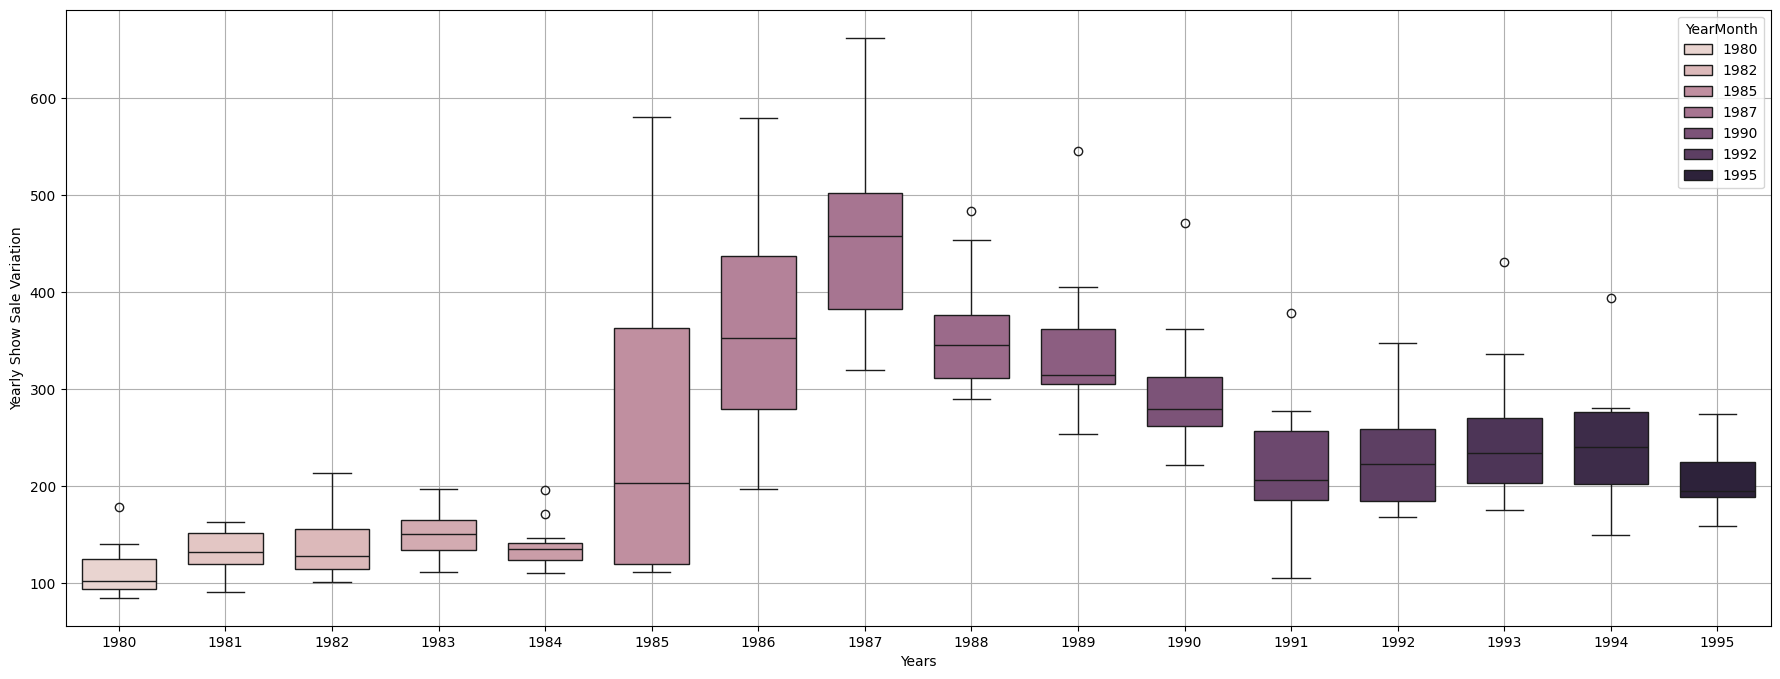

In [12]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x =df.index.year, y=df['Shoe_Sales'], data=df,hue= df.index.year, width= 0.7, dodge=False, ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Show Sale Variation');


**as per the the above yearly plot, 1987 was the year of highest production and year 1980 is been the lowest.**

Plot a monthly boxplot for the shoe sales taking all the years into account.

As this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

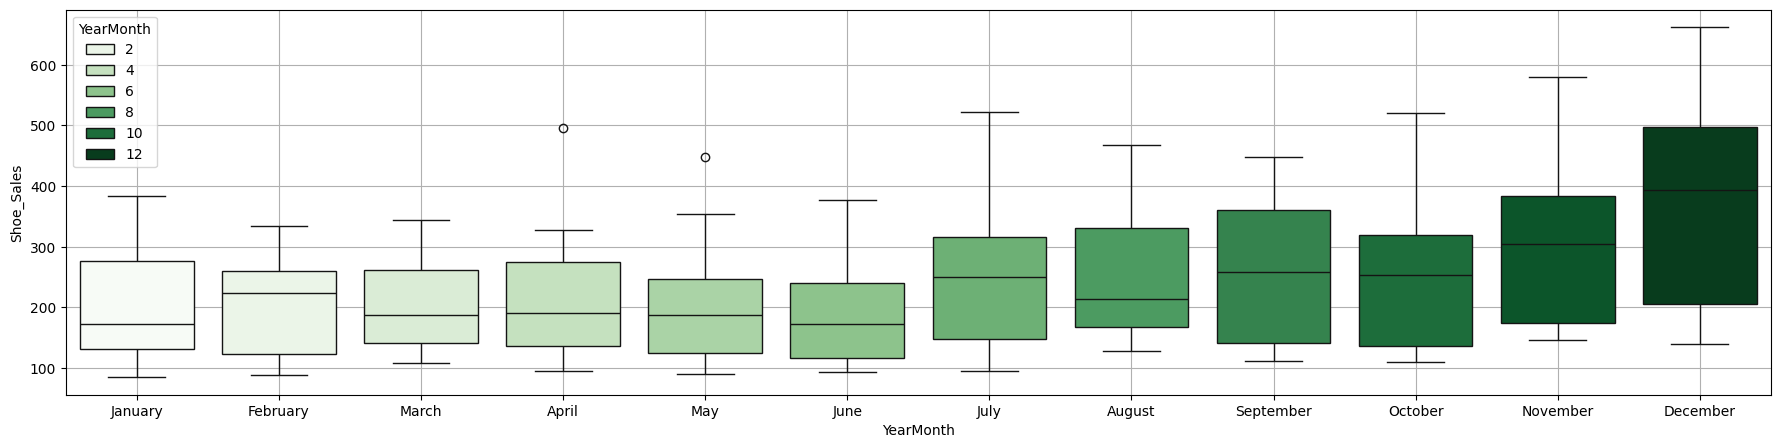

In [13]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x =df.index.month_name(), y=df['Shoe_Sales'], data=df,hue=df.index.month, palette='Greens',  ax=ax,whis=1.5)
plt.grid();

**Monthly plot shows DEC months cumulatively is the highest in production.**

## Plot a graph of monthly sales across years.

In [14]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Shoe_Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

YearMonth  April  August  December  February  January   July   June  March  \
YearMonth                                                                    
1980        95.0   128.0     140.0      89.0     85.0   96.0   95.0  109.0   
1981       132.0   155.0     163.0     132.0    150.0  109.0   94.0  155.0   
1982       112.0   163.0     214.0     123.0    101.0  153.0  116.0  127.0   
1983       156.0   165.0     197.0     122.0    134.0  134.0  169.0  142.0   
1984       137.0   171.0     196.0     124.0    124.0  136.0  134.0  139.0   
1985       122.0   344.0     523.0     118.0    112.0  281.0  118.0  125.0   
1986       306.0   431.0     579.0     246.0    348.0  358.0  280.0  197.0   
1987       496.0   468.0     662.0     335.0    384.0  523.0  377.0  320.0   
1988       328.0   355.0     454.0     308.0    304.0  483.0  338.0  313.0   
1989       254.0   294.0     545.0     303.0    306.0  379.0  310.0  344.0   
1990       273.0   285.0     471.0     243.0    268.0  302.0  222.0  273.0   
1991       186.0   214.0     378.0     253.0    198.0  228.0  105.0  173.0   
1992       179.0   211.0     347.0     182.0    185.0  250.0  168.0  258.0   
1993       242.0   319.0     431.0     217.0    203.0  252.0  175.0  227.0   
1994       279.0   205.0     394.0     280.0    150.0  225.0  227.0  187.0   
1995       195.0     NaN       NaN     230.0    159.0  274.0  220.0  188.0   

YearMonth    May  November  October  September  
YearMonth                                       
1980        91.0     178.0    111.0      124.0  
1981        91.0     150.0    130.0      123.0  
1982       108.0     170.0    142.0      128.0  
1983       145.0     165.0    111.0      156.0  
1984       127.0     147.0    110.0      112.0  
1985       120.0     580.0    362.0      366.0  
1986       279.0     504.0    433.0      448.0  
1987       448.0     493.0    520.0      428.0  
1988       354.0     352.0    290.0      439.0  
1989       309.0     405.0    318.0      356.0  
1990       236.0     362.0    322.0      309.0  
1991       185.0     277.0    270.0      189.0  
1992       197.0     305.0    234.0      260.0  
1993       185.0     336.0    254.0      202.0  
1994       193.0     275.0    254.0      259.0  
1995       189.0       NaN      NaN        NaN

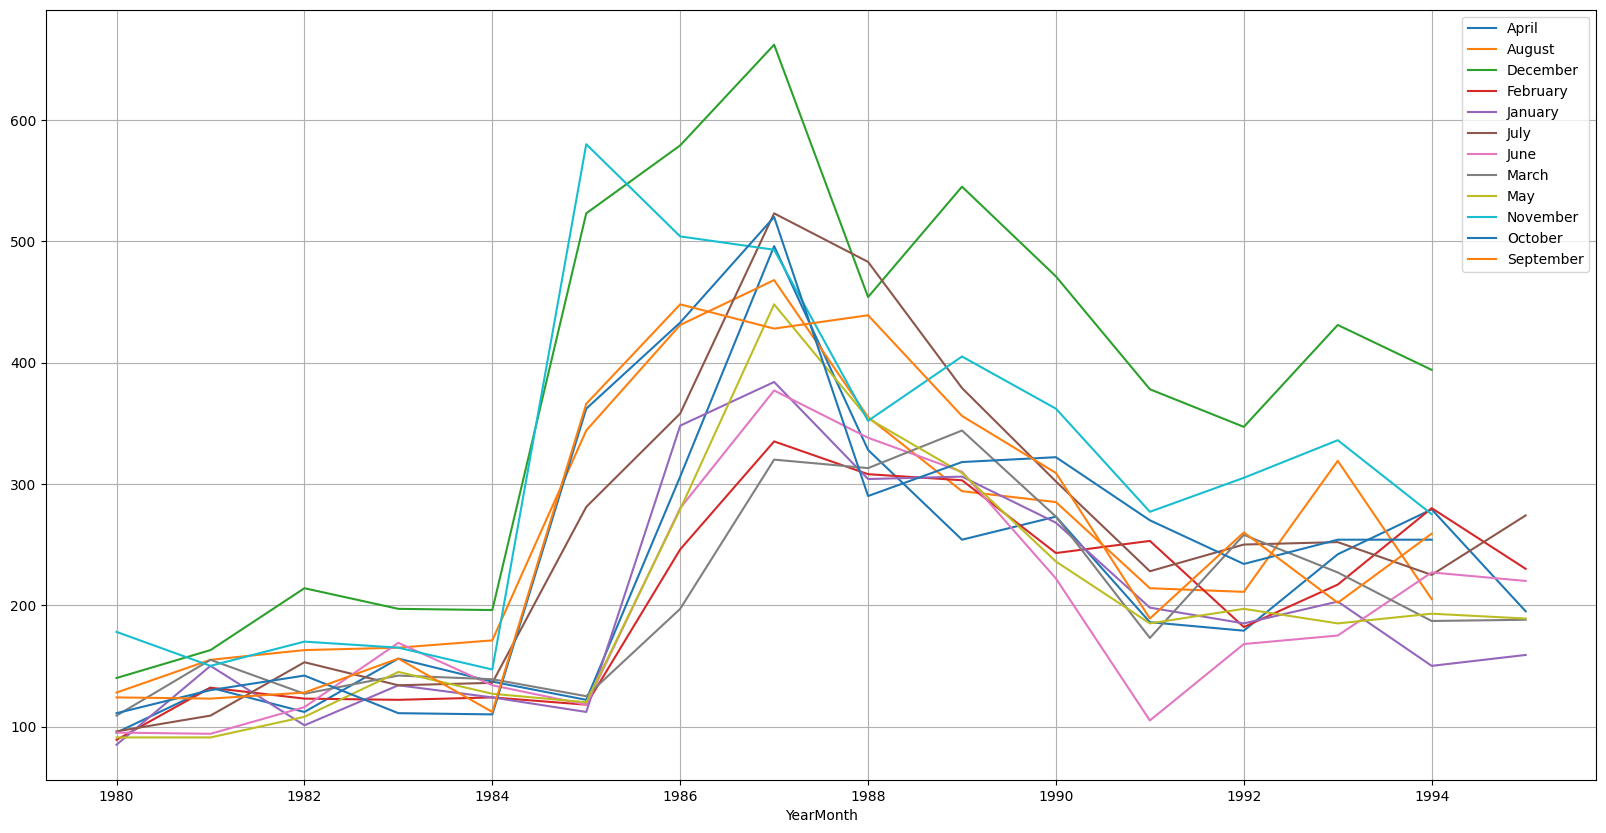

In [15]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

**Same trends can be seen in this plot as well, DEC month being the highest selling month across years.**

## Decompose the Time Series

### **Additive Model**

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

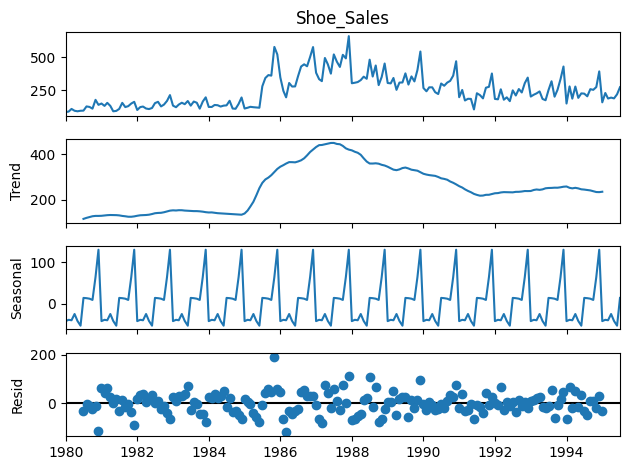

In [17]:
decomposition = seasonal_decompose(df['Shoe_Sales'],model='additive')
decomposition.plot();

• The seasonality is relatively constant over time.

• yt = Trend + Seasonality + Residual

### **Multiplicative Model**

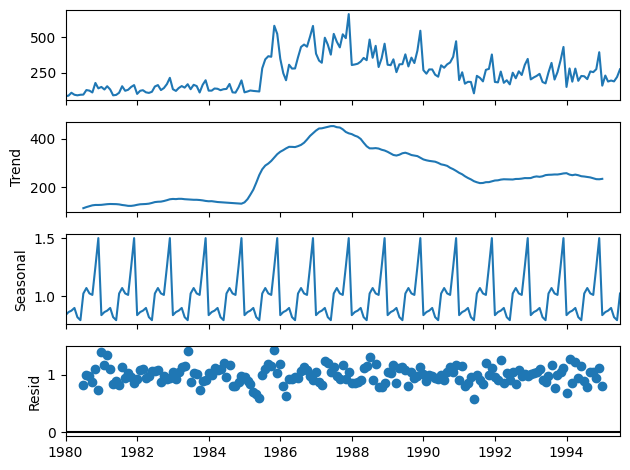

In [18]:
Decomposition1 = seasonal_decompose(df,model='multiplicative')
Decomposition1.plot();

In [19]:
df.shape

(187, 1)

• The seasonality increases or decreases over time. It is proportionate to the
trend.

• yt = Trend * Seasonalit y * Residual

### Split the data into training and test. The test data should start in 1991.

In [20]:
train = df['1980-01-01':'1990-12-31']
test  = df['1991-01-01':'1995-07-01']

In [21]:
df.shape


(187, 1)

In [22]:
# Printing the Shoe Sales Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
...                ...
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

[132 rows x 1 columns]

Test Data


Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185
1991-06-01         105
1991-07-01         228
1991-08-01         214
1991-09-01         189
1991-10-01         270
1991-11-01         277
1991-12-01         378
1992-01-01         185
1992-02-01         182
1992-03-01         258
1992-04-01         179
1992-05-01         197
1992-06-01         168
1992-07-01         250
1992-08-01         211
1992-09-01         260
1992-10-01         234
1992-11-01         305
1992-12-01         347
1993-01-01         203
1993-02-01         217
1993-03-01         227
1993-04-01         242
1993-05-01         185
1993-06-01         175
1993-07-01         252
1993-08-01         319
1993-09-01         202
1993-10-01         254
1993-11-01         336
1993-12-01         431
1994-01-01         150
1994-02-01         280
1994-03-01         187
1994-04-01         279
1994-05-01         193
1994-06-01         227
1994-07-01         225
1994-08-01         205
1994-09-01         259
1994-10-01         254
1994-11-01         275
1994-12-01         394
1995-01-01         159
1995-02-01         230
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

In [23]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [24]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91 

Last few rows of Training Data 
             Shoe_Sales
YearMonth             
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471 

First few rows of Test Data 
             Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185 

Last few rows of Test Data 
             Shoe_Sales
YearMonth             
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274 



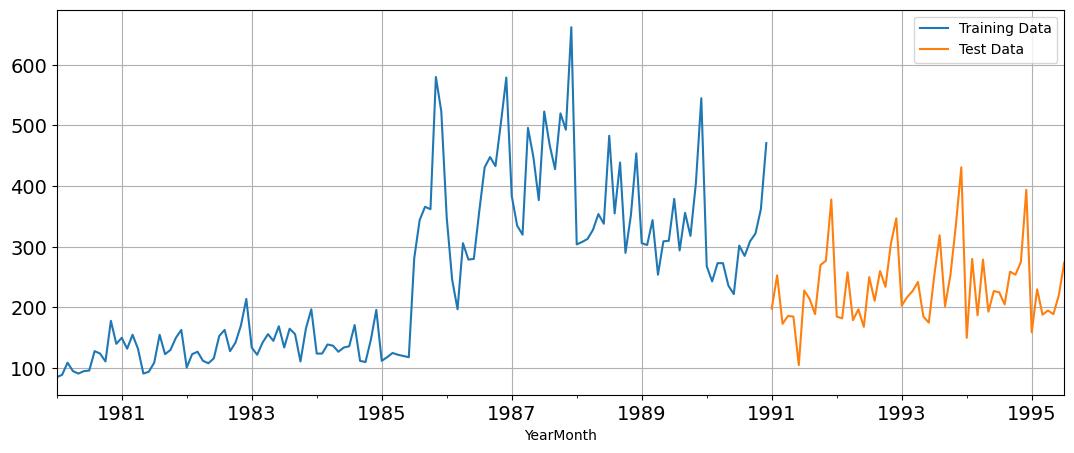

In [25]:
train['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
test['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

### Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

##Linear Regression: Model 1

For this particular linear regression, we are going to regress the 'Shoe Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [26]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


As we have successfully generated the numerical time instance order for both the training and test set. we will now add these values in the training and test set.

In [27]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [28]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
YearMonth                   
1980-01-01          85     1
1980-02-01          89     2
1980-03-01         109     3
1980-04-01          95     4
1980-05-01          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
YearMonth                   
1990-08-01         285   128
1990-09-01         309   129
1990-10-01         322   130
1990-11-01         362   131
1990-12-01         471   132 

First few rows of Test Data 
             Shoe_Sales  time
YearMonth                   
1991-01-01         198   133
1991-02-01         253   134
1991-03-01         173   135
1991-04-01         186   136
1991-05-01         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
YearMonth                   
1995-03-01         188   183
1995-04-01         195   184
1995-05-01         189   185
1995-06-01         220   186
1995-07-01         274   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [29]:
#importing the liabrary
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

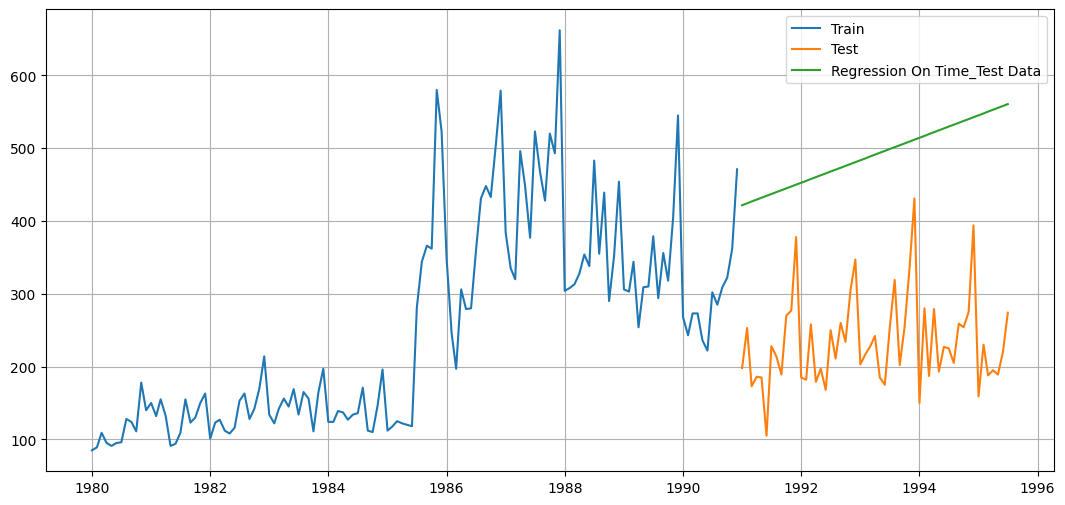

In [32]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

As we see the model has not given us appropriate prediction, will check the model numerical RMSE for further evaluation  

### Defining the accuracy metrics.

In [33]:
from sklearn import metrics

### Regression Model Evaluation

In [34]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 266.28


In [35]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  266.276472

As noticed, RMSE came 264.51... lets build Niave Model and check what it turns out to be..

##Naive Approach(NA): yt+1 =Yt : Method 2

for naive model, as we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is same as tomorrow, so  the prediction of tomorrow is same as today, therefore the prediction for day after tomorrow is also today.

In [36]:
#making model on copied data
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [37]:
NaiveModel_test['naive']= np.asanyarray(train['Shoe_Sales'])[len(np.asanyarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    471
1991-02-01    471
1991-03-01    471
1991-04-01    471
1991-05-01    471
Name: naive, dtype: int64

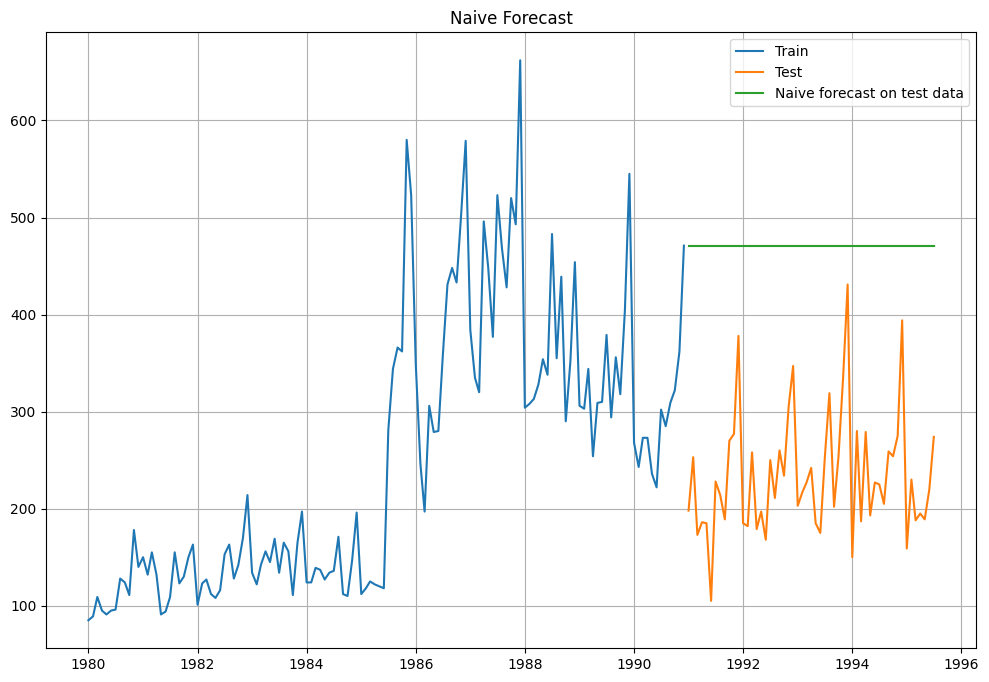

In [38]:
#Lets plot the model
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label= 'Test')
plt.plot(NaiveModel_test['naive'], label= 'Naive forecast on test data')
plt.legend(loc='best')
plt.title ('Naive Forecast')
plt.grid();

This model too did not given predictions to the satisfaction level, lets find out RMSE and compare it with regression model

### Naive Model Evaluation

In [39]:
#test data - RMSE
rmse_model2_test= metrics.mean_squared_error(test['Shoe_Sales'], NaiveModel_test['naive'],squared=False)
print('for Naive model forecast on the test data, RMSE is %3.3f'%(rmse_model2_test))


for Naive model forecast on the test data, RMSE is 245.121


In [40]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  266.276472
NaiveModel        245.121306

RMSE looks slightly better but not to the mark..lets build more models

## Simple Average Model: Model 3

For simple average model, we will be forecasting by using the average of the traning data values.

In [41]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [42]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

Shoe_Sales  mean_forecast
YearMonth                            
1991-01-01         198     250.575758
1991-02-01         253     250.575758
1991-03-01         173     250.575758
1991-04-01         186     250.575758
1991-05-01         185     250.575758

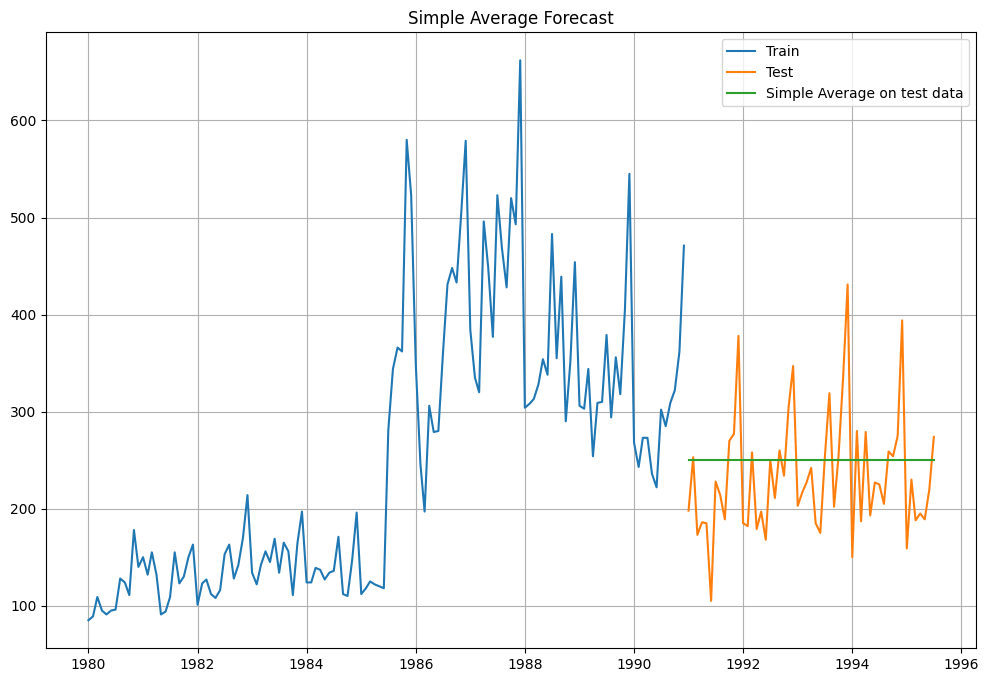

In [43]:
#Lets plot the model
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label= 'Test')
plt.plot(SimpleAverage_test['mean_forecast'], label= 'Simple Average on test data')
plt.legend(loc='best')
plt.title ('Simple Average Forecast')
plt.grid();

Simple Average Model looks no good, will check the RMSE to have a numeritive analysis..

# Model Evaluation

In [44]:
#test data - RMSE
rmse_model3_test= metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print('for Simple Average model forecast on the test data, RMSE is %3.3f'%(rmse_model3_test))

for Simple Average model forecast on the test data, RMSE is 63.985


Simple Average model by far the best with lowest RMSE score.

In [45]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    266.276472
NaiveModel          245.121306
SimpleAverageModel   63.984570

## Moving Average(MA): Method 4

Moving average models method will calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.



For This, The average will be on overall data.

In [46]:
MovingAverage = df.copy()
MovingAverage.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

**Trailing moving averages**

In [47]:
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head()

Shoe_Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                             
1980-01-01          85         NaN         NaN         NaN         NaN
1980-02-01          89        87.0         NaN         NaN         NaN
1980-03-01         109        99.0         NaN         NaN         NaN
1980-04-01          95       102.0        94.5         NaN         NaN
1980-05-01          91        93.0        96.0         NaN         NaN

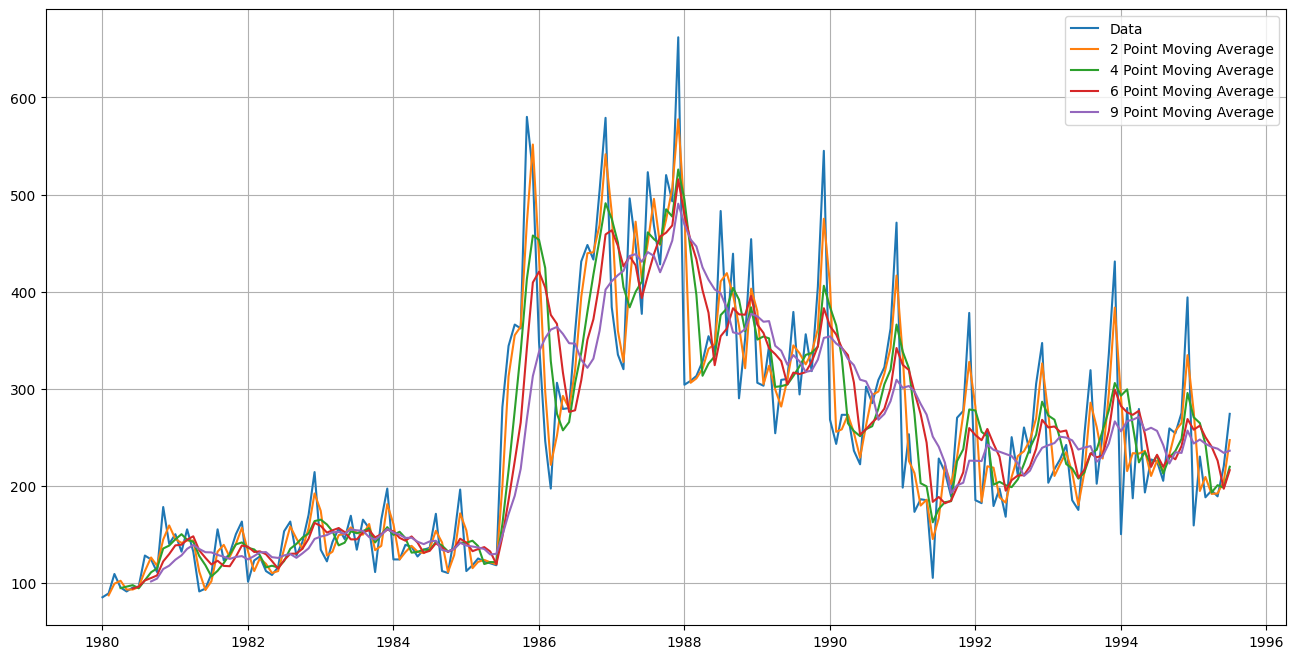

In [48]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Shoe_Sales'], label='Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

### As we observed, only 2 point MA given somewhat better performance but still not to expectations.  



Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in

In [49]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage['1980-01-01':'1990-12-31']
trailing_MovingAverage_test=MovingAverage['1991-01-01':'1995-07-01']

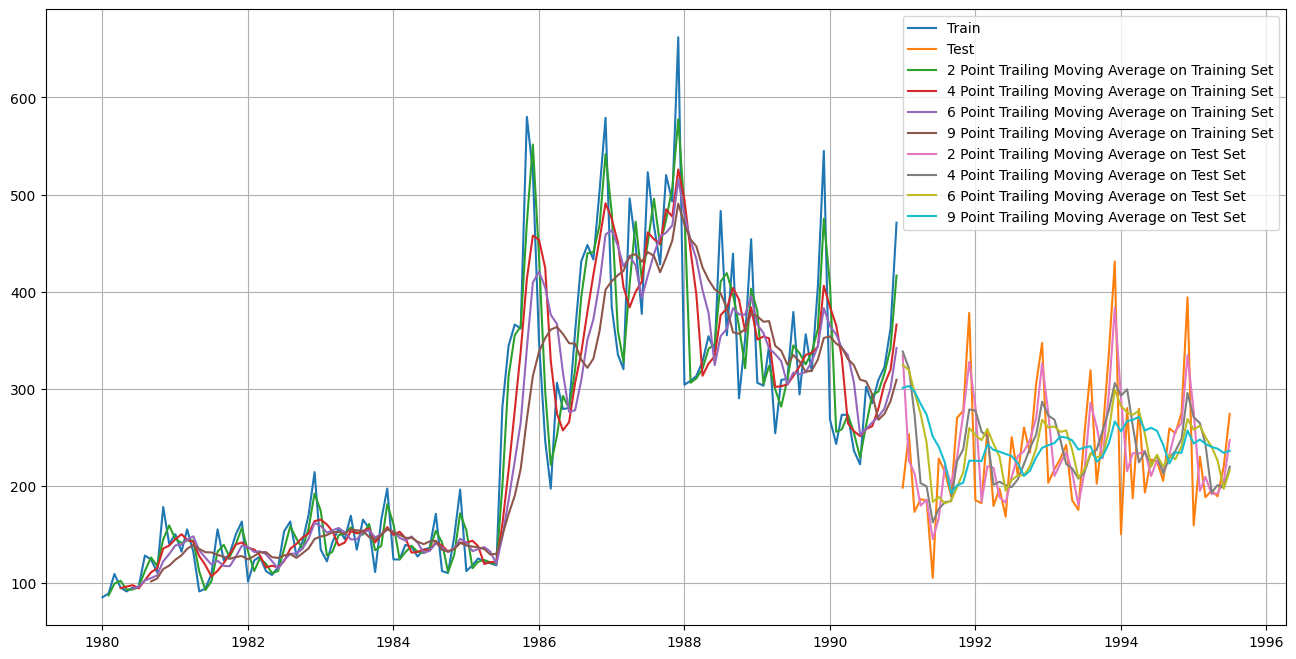

In [50]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

Once again the 2 point trailing MA model looks better among all on both test and train data set

**Model Evaluation**

Will consider only test data here.

In [51]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 45.949
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 57.873
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 63.457
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 67.724 


As observed above, all MA models scoring with lower RMSE and 2 point being the best amongst all, will still not take any of these models considering we are predicting the forecast for one year and so.

As per the above comparison 2 point MA model has the lowest RMSE score

In [52]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             266.276472
NaiveModel                   245.121306
SimpleAverageModel            63.984570
2pointTrailingMovingAverage   45.948736
4pointTrailingMovingAverage   57.872686
6pointTrailingMovingAverage   63.456893
9pointTrailingMovingAverage   67.723648

Before we go on to build the various Exponential Smoothing models, let us plot all the models with appropriate RMSE and compare them in plots.

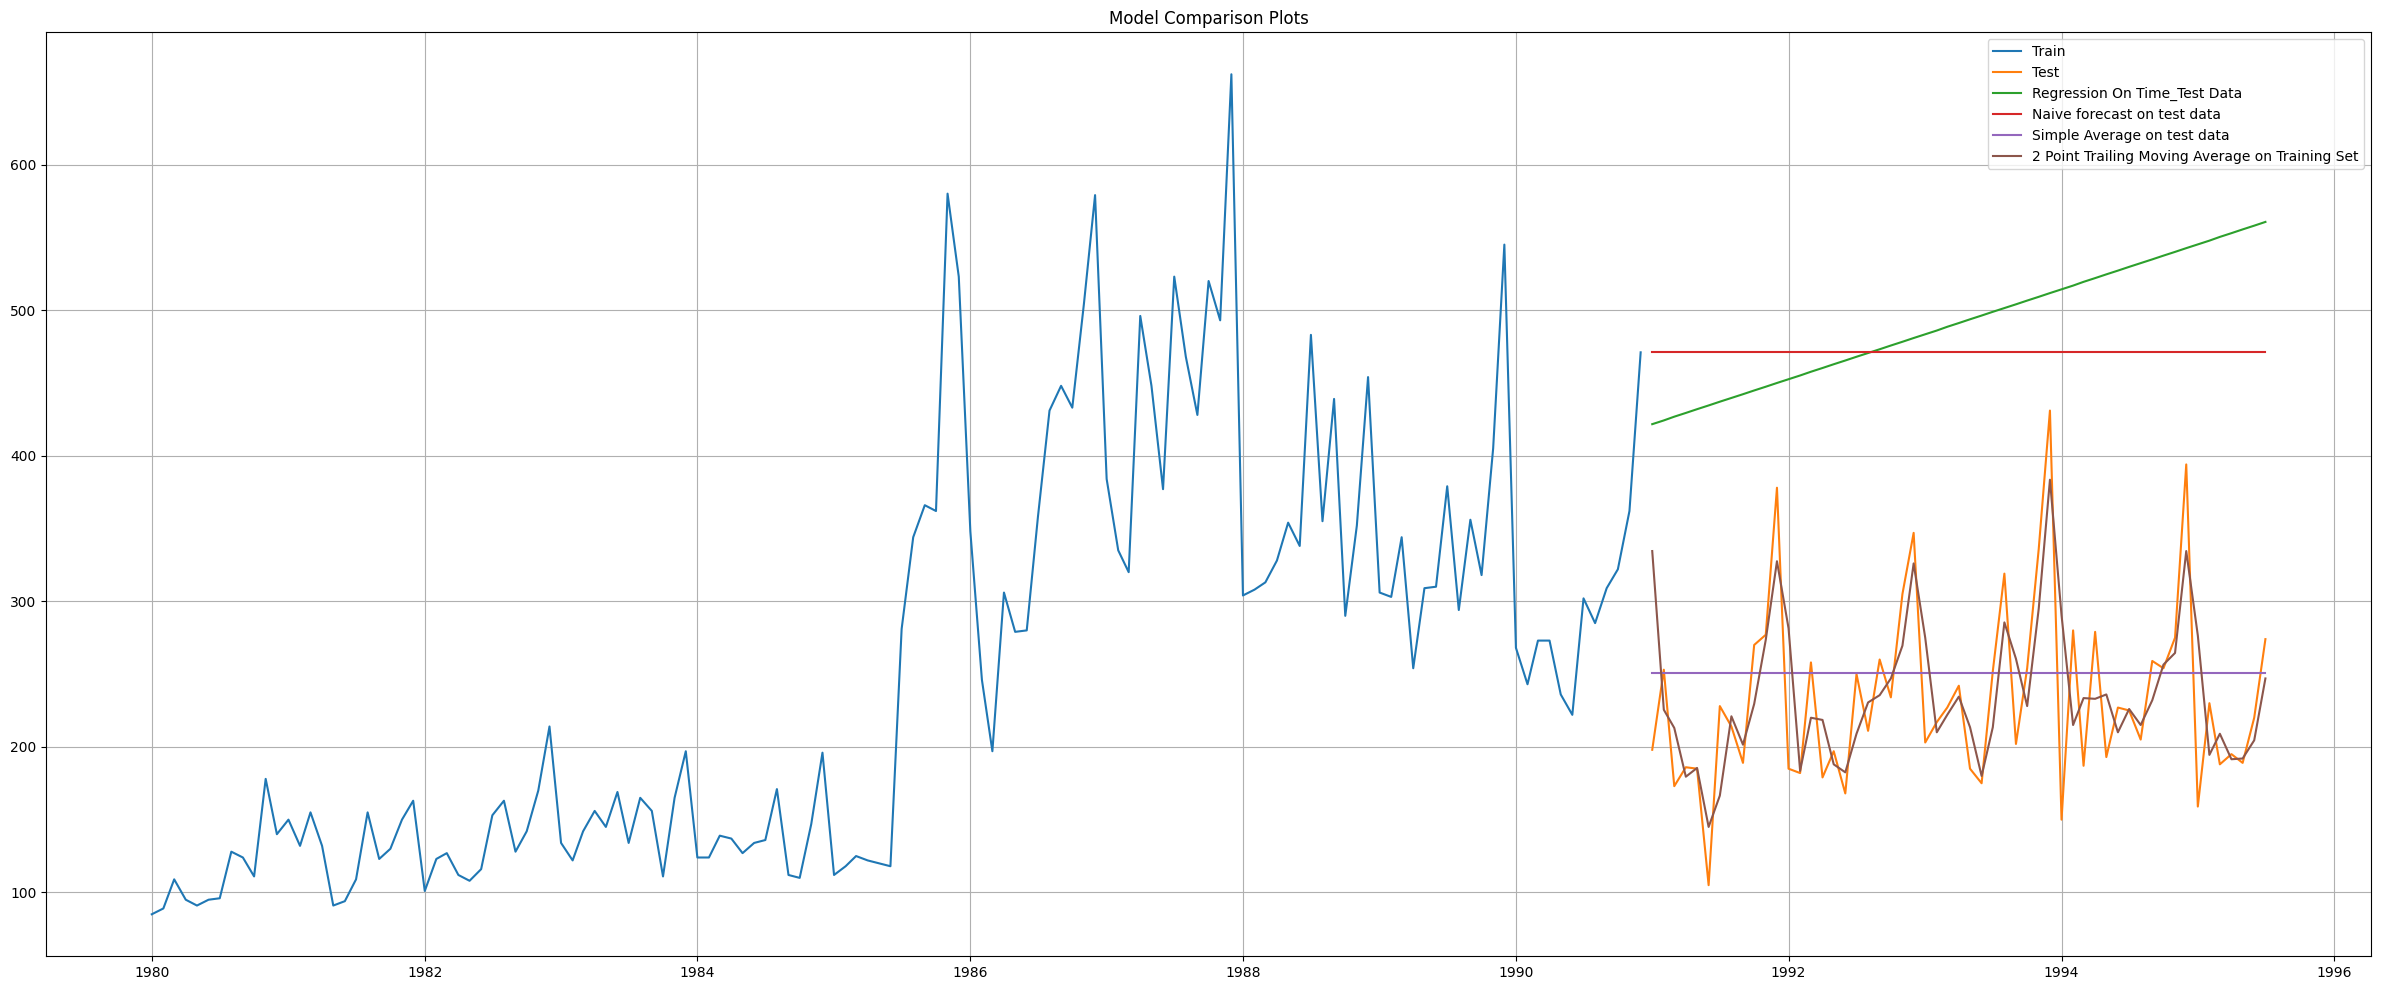

In [53]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label= 'Naive forecast on test data')
plt.plot(SimpleAverage_test['mean_forecast'], label= 'Simple Average on test data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

After ploting all models together, we can see except 2 points MA model none of them are coming any closer to the data and as monetnoed earlier MA models are not the best fit for our forecast so we will keep chaeck other models.

## Simple Exponential Smoothing(SES): Method 3

In [54]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Will create SES data frame and copy data from train and test data

In [55]:
SES_train = train.copy()
SES_test = test.copy()

In [56]:
# create class
model_SES = SimpleExpSmoothing(SES_train['Shoe_Sales'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [58]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.6051903749099211,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 85.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
# Using the fitted model on the training set to forecast on the test set
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Shoe_Sales     predict
YearMonth                         
1991-01-01         198  420.251632
1991-02-01         253  420.251632
1991-03-01         173  420.251632
1991-04-01         186  420.251632
1991-05-01         185  420.251632

In [60]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.tail()

Shoe_Sales     predict
YearMonth                         
1995-03-01         188  420.251632
1995-04-01         195  420.251632
1995-05-01         189  420.251632
1995-06-01         220  420.251632
1995-07-01         274  420.251632

In [61]:
SES_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Shoe_Sales  55 non-null     int64  
 1   predict     55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


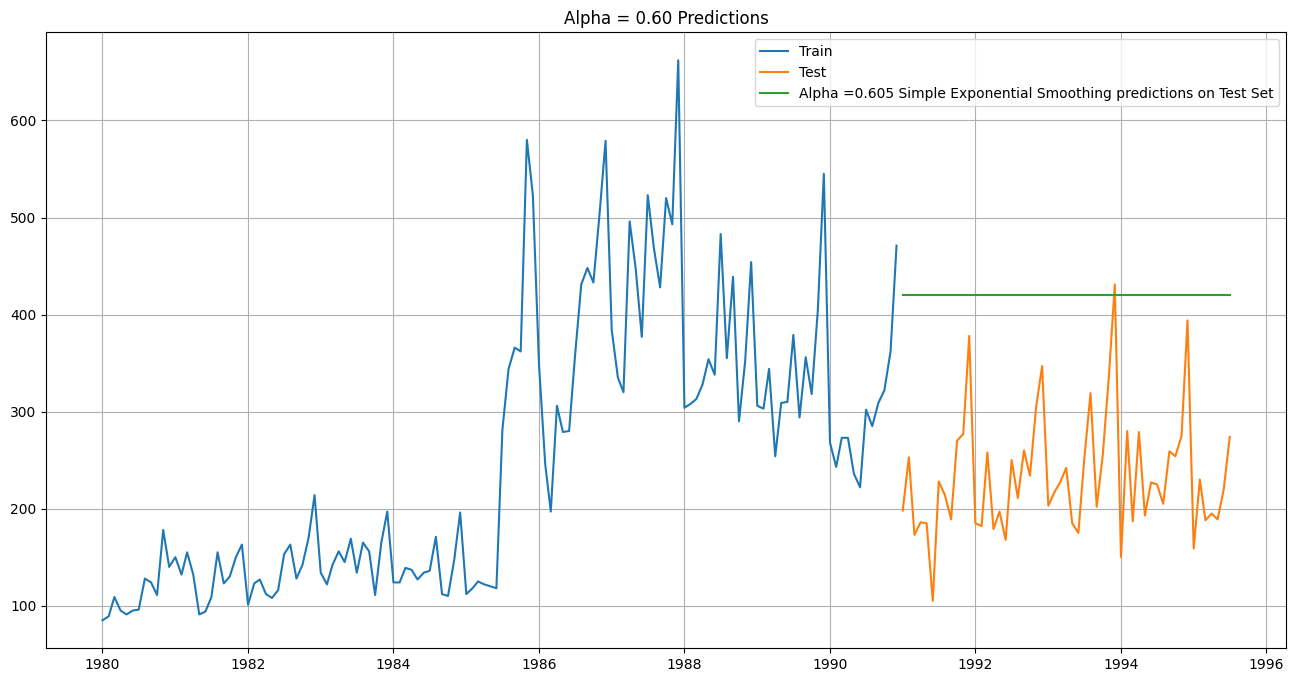

In [62]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(16,8))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.605 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.60 Predictions');

**Model Evaluation for  𝛼  = 00.605: Simple Exponential Smoothing**

In [63]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.605 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.605 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 196.426


In [64]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.605,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        266.276472
NaiveModel                              245.121306
SimpleAverageModel                       63.984570
2pointTrailingMovingAverage              45.948736
4pointTrailingMovingAverage              57.872686
6pointTrailingMovingAverage              63.456893
9pointTrailingMovingAverage              67.723648
Alpha=0.605,SimpleExponentialSmoothing  196.425508

**Setting different alpha values.**

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.



*We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.*

In [65]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_5A = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5A

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [66]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)

    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Shoe_Sales'],SES_train['predict',i],squared=False)

    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict',i],squared=False)

    resultsDf_5A = resultsDf_5A.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

<ipython-input-66-87710d33645e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_5A = resultsDf_5A.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
<ipython-input-66-87710d33645e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_5A = resultsDf_5A.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
<ipython-input-66-87710d33645e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_5A = resultsDf_5A.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
<ipython-input-66-87710d33645e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_5A = resultsDf_5A.append({'Alpha Values':i,'Trai

## Model Evaluation

In [67]:
resultsDf_5A.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE   Test RMSE
0           0.3   74.555356  143.400350
1           0.4   73.062722  162.553211
2           0.5   72.200617  180.072484
3           0.6   71.902349  195.663327
4           0.7   72.131707  209.658339
5           0.8   72.846955  222.417584
6           0.9   74.023429  234.188166

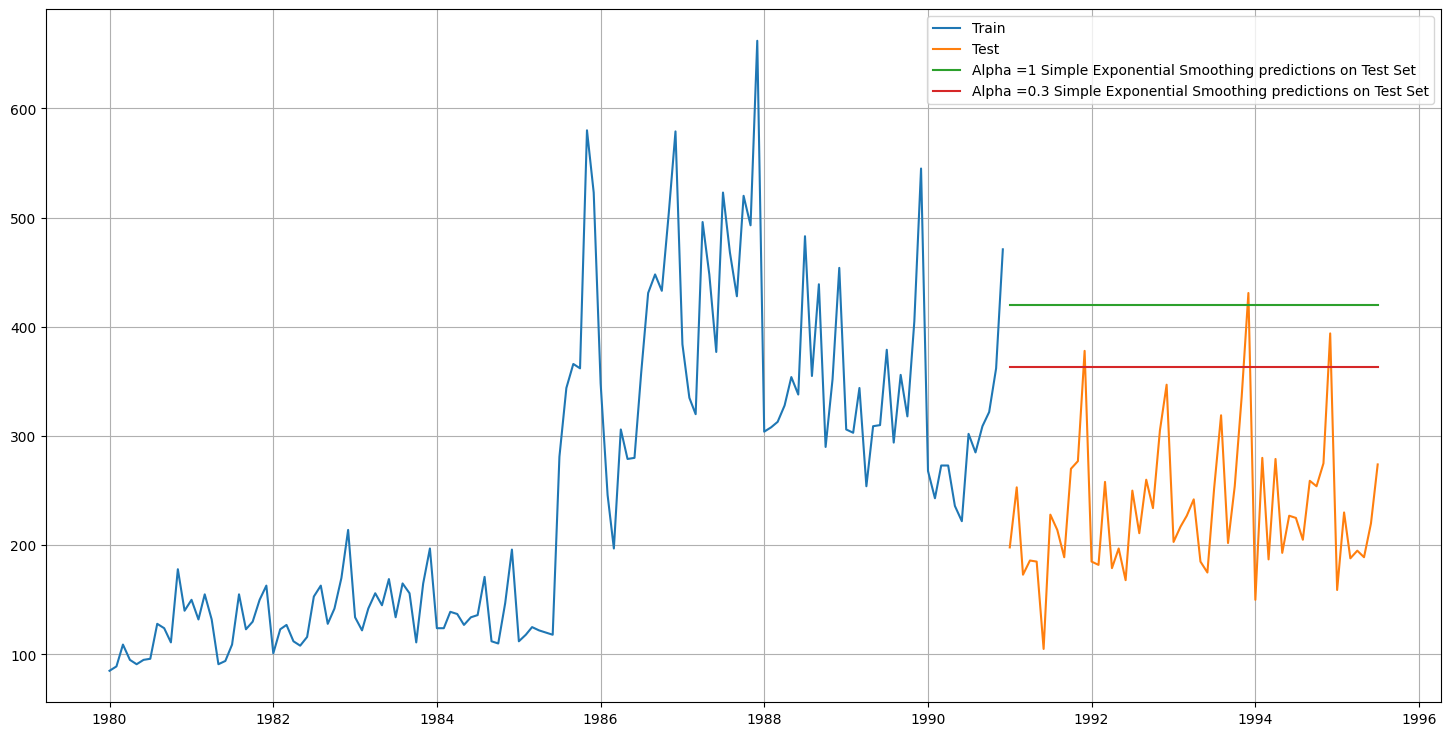

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [69]:
resultsDf_5A_1 = pd.DataFrame({'Test RMSE': [resultsDf_5A.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5A_1])
resultsDf

Test RMSE
RegressionOnTime                        266.276472
NaiveModel                              245.121306
SimpleAverageModel                       63.984570
2pointTrailingMovingAverage              45.948736
4pointTrailingMovingAverage              57.872686
6pointTrailingMovingAverage              63.456893
9pointTrailingMovingAverage              67.723648
Alpha=0.605,SimpleExponentialSmoothing  196.425508
Alpha=0.3,SimpleExponentialSmoothing    143.400350

Simple Exponential Smoothing given lower RMSE than Regression and Naive but this still overfilling model.

WIll try Double Exponential Smoothing (Holt's Model) model for further evaluation.

###Double Exponential Smoothing (Holt's Model)

In [70]:
DES_train = train.copy()
DES_test = test.copy()

In [71]:
DES_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [72]:
model_DES = Holt(DES_train['Shoe_Sales'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
##  will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [74]:
for i in np.arange(0.3,1.1,0.1):
  for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)

        rmse_model6_train = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict',i,j],squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict',i,j],squared=False)

        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

<ipython-input-74-d423cf44568c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
<ipython-input-74-d423cf44568c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
<ipython-input-74-d423cf44568c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
<ipython-input-74-d423cf44568c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_6 = resultsD

### Model Evaluation

In [75]:
resultsDf_6

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   84.736667   84.736667
1            0.3          0.4   88.649551   88.649551
2            0.3          0.5   92.421849   92.421849
3            0.3          0.6   95.729786   95.729786
4            0.3          0.7   98.137776   98.137776
..           ...          ...         ...         ...
59           1.0          0.6   97.917760   97.917760
60           1.0          0.7  102.519502  102.519502
61           1.0          0.8  107.552006  107.552006
62           1.0          0.9  113.113025  113.113025
63           1.0          1.0  119.350991  119.350991

[64 rows x 4 columns]

In [76]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
24           0.6          0.3   79.699269  79.699269
32           0.7          0.3   79.936769  79.936769
16           0.5          0.3   80.640171  80.640171
40           0.8          0.3   81.151894  81.151894
25           0.6          0.4   81.561698  81.561698

In [77]:
resultsDf_6.sort_values(by=['Train RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
24           0.6          0.3   79.699269  79.699269
32           0.7          0.3   79.936769  79.936769
16           0.5          0.3   80.640171  80.640171
40           0.8          0.3   81.151894  81.151894
25           0.6          0.4   81.561698  81.561698

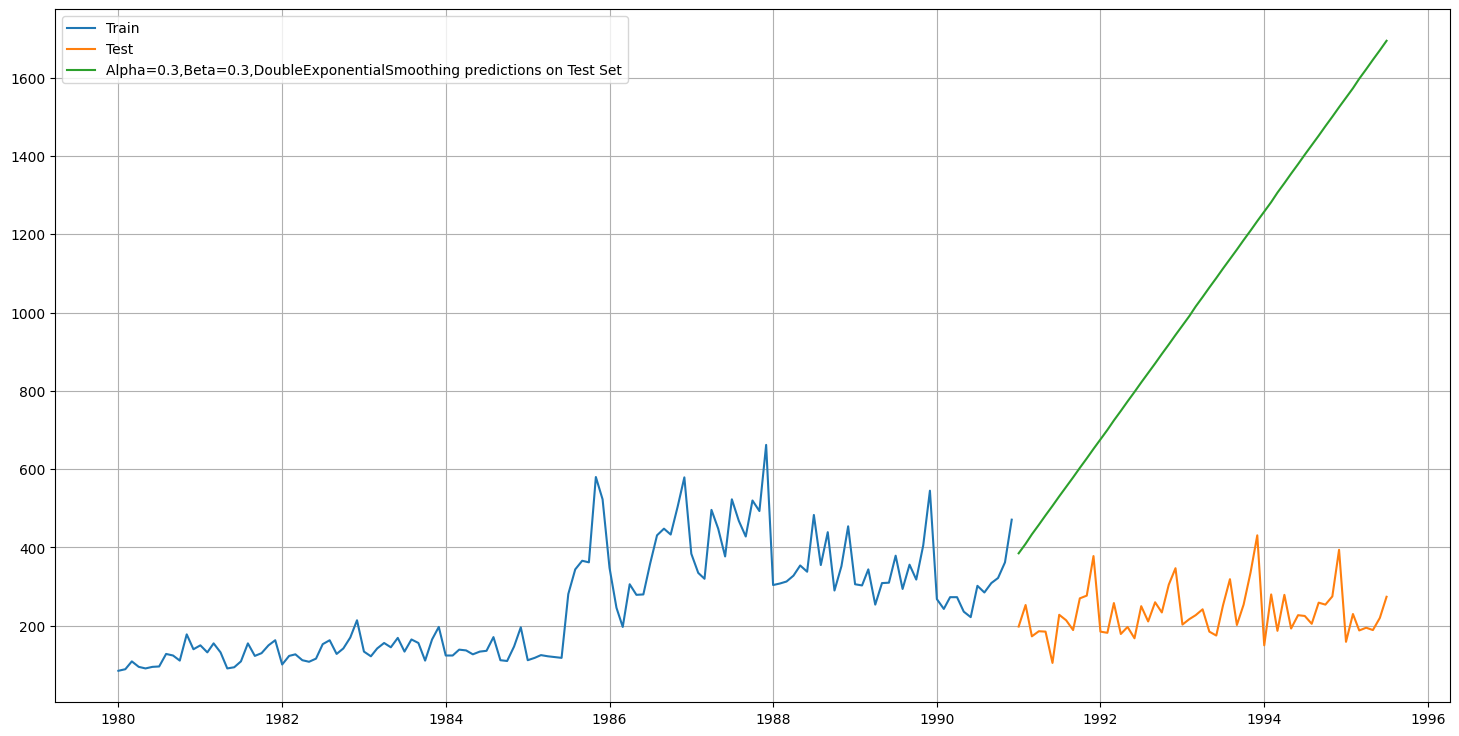

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict',0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [79]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                               266.276472
NaiveModel                                     245.121306
SimpleAverageModel                              63.984570
2pointTrailingMovingAverage                     45.948736
4pointTrailingMovingAverage                     57.872686
6pointTrailingMovingAverage                     63.456893
9pointTrailingMovingAverage                     67.723648
Alpha=0.605,SimpleExponentialSmoothing         196.425508
Alpha=0.3,SimpleExponentialSmoothing           143.400350
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing   79.699269

Double Exponential model is also failing as it did not give us required outcome.
RMSE is lower though..so far 2 point MA model seems to be the best fit.

Will try out tripple Exponential model.

## Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [80]:
TES_train = train.copy()
TES_test = test.copy()

In [81]:
TES_train.shape

(132, 1)

In [82]:
model_TES = ExponentialSmoothing(TES_train['Shoe_Sales'], trend='additive',seasonal='multiplicative',initialization_method='estimated')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python chose for the model.

In [84]:
model_TES_autofit.params

{'smoothing_level': 0.6009868693481561,
 'smoothing_trend': 0.006156909298740214,
 'smoothing_seasonal': 0.17574086651628373,
 'damping_trend': nan,
 'initial_level': 107.69608365185793,
 'initial_trend': 0.4232661374510192,
 'initial_seasons': array([1.09755031, 0.99553258, 1.21255323, 1.38802376, 1.29807702,
        1.10890294, 1.22578614, 1.43128568, 1.70333676, 1.4459007 ,
        1.7104661 , 1.94336275]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Shoe_Sales  auto_predict
YearMonth                           
1991-01-01         198    263.531912
1991-02-01         253    245.139749
1991-03-01         173    259.792279
1991-04-01         186    276.337606
1991-05-01         185    272.442200

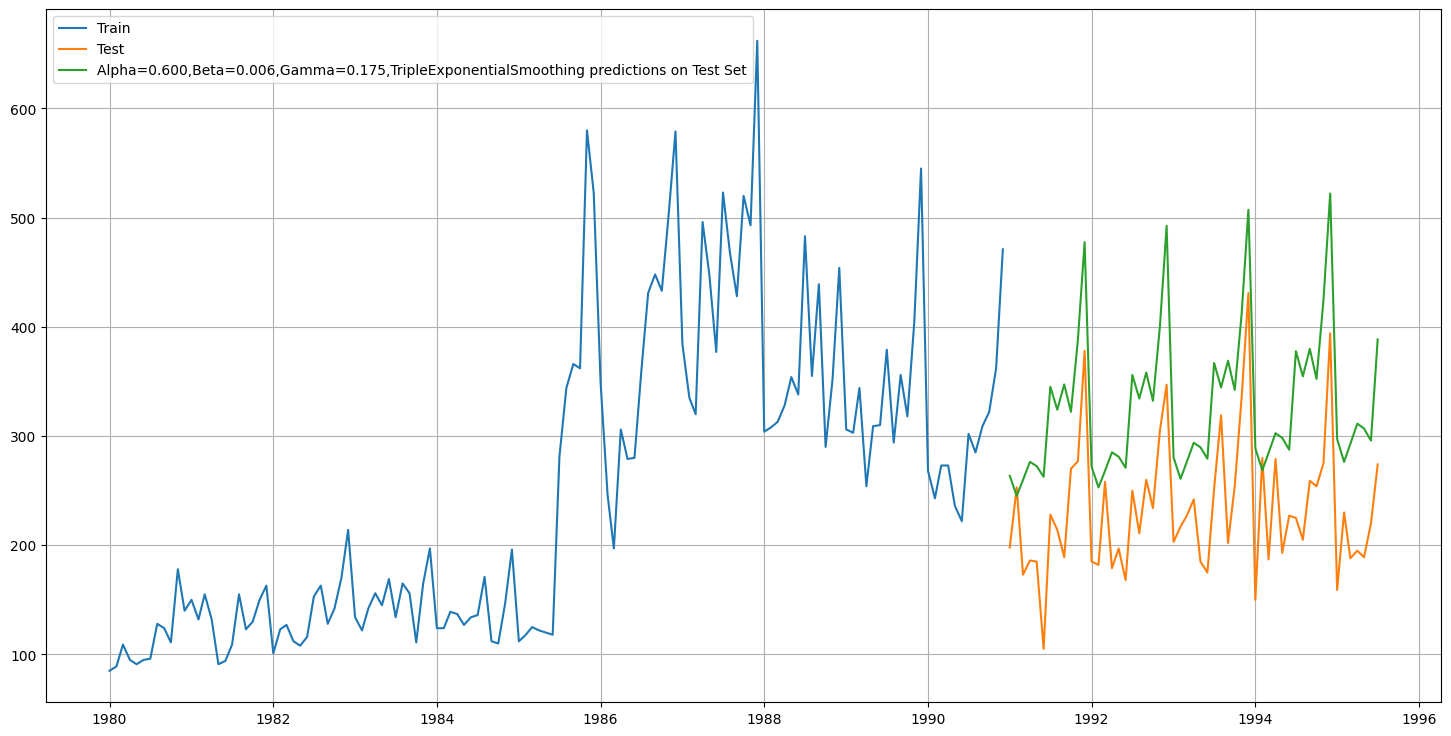

In [86]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.600,Beta=0.006,Gamma=0.175,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [87]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.605,Beta=0.006,Gamma=0.175, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.605,Beta=0.006,Gamma=0.175, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 102.118


In [88]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.425508
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        79.699269
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...  102.117637

In [89]:
# First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [90]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)

            rmse_model7_train = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict',i,j,k],squared=False)

            rmse_model7_test = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict',i,j,k],squared=False)

            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test}
                                                 , ignore_index=True)

<ipython-input-90-1ac4f1eee2a9>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
<ipython-input-90-1ac4f1eee2a9>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
<ipython-input-90-1ac4f1eee2a9>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
<ipython-input-90-1ac4f1eee2a9>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_7_2 = resultsDf_7_2.append({'Alpha Valu

In [91]:
resultsDf_7_2

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.3          0.3           0.3      62.757384    114.715477
1             0.3          0.3           0.4      70.221173     47.886599
2             0.3          0.3           0.5      82.917685     91.124921
3             0.3          0.3           0.6     104.114083     74.200073
4             0.3          0.3           0.7     140.294383    518.523846
..            ...          ...           ...            ...           ...
507           1.0          1.0           0.6   14367.376680  55230.683900
508           1.0          1.0           0.7  210424.123875  15034.794079
509           1.0          1.0           0.8   36208.470614  52723.576222
510           1.0          1.0           0.9   13994.657355  31079.374056
511           1.0          1.0           1.0    1973.374460  44342.695751

[512 rows x 5 columns]


sorting the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [92]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
1             0.3          0.3           0.4   70.221173  47.886599
65            0.4          0.3           0.4   63.772346  63.601680
325           0.8          0.3           0.8   97.587052  72.959100
57            0.3          1.0           0.4   63.578341  73.527921
3             0.3          0.3           0.6  104.114083  74.200073

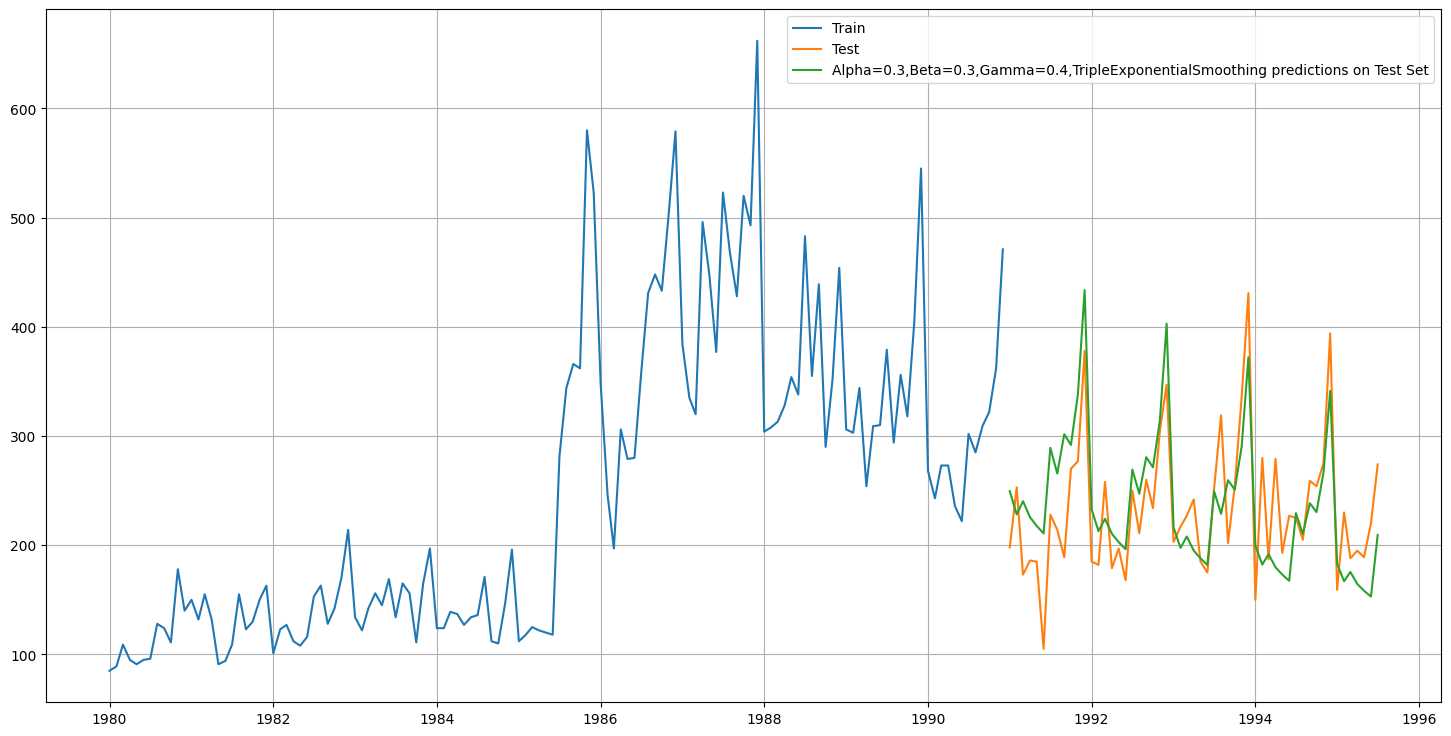

In [93]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [94]:
#Checking the RMSE on the model
resultsDf_7_1A = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1A])
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.425508
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        79.699269
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...  102.117637
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...  102.117637

Getting almost same RMSE on both triple Exponential Smoothining models.

**Ploting all 3 exponential models together**

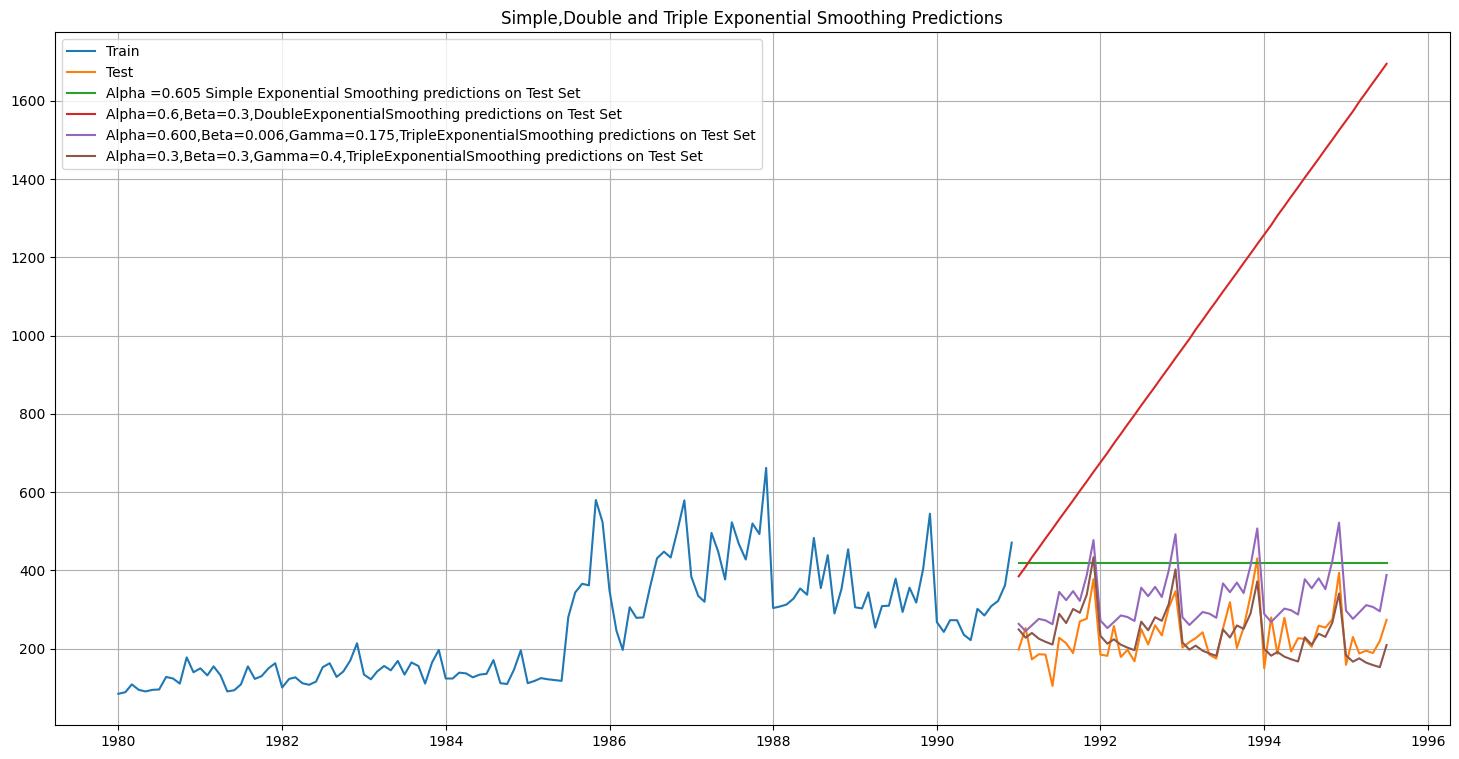

In [95]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(18,9))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.605 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.6,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.600,Beta=0.006,Gamma=0.175,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

As seen in plots, out of all three the triple exponential model somewhat perfomed well but it still not to the expected mark.

### Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

### to build  the Arima and Sarima Models,  we need to  check if the data is  stationery or not.  To do that we will run the test on adfuller function.

*P Value should be less than 0.05% if the data is stationary *

In [96]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(18,9))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

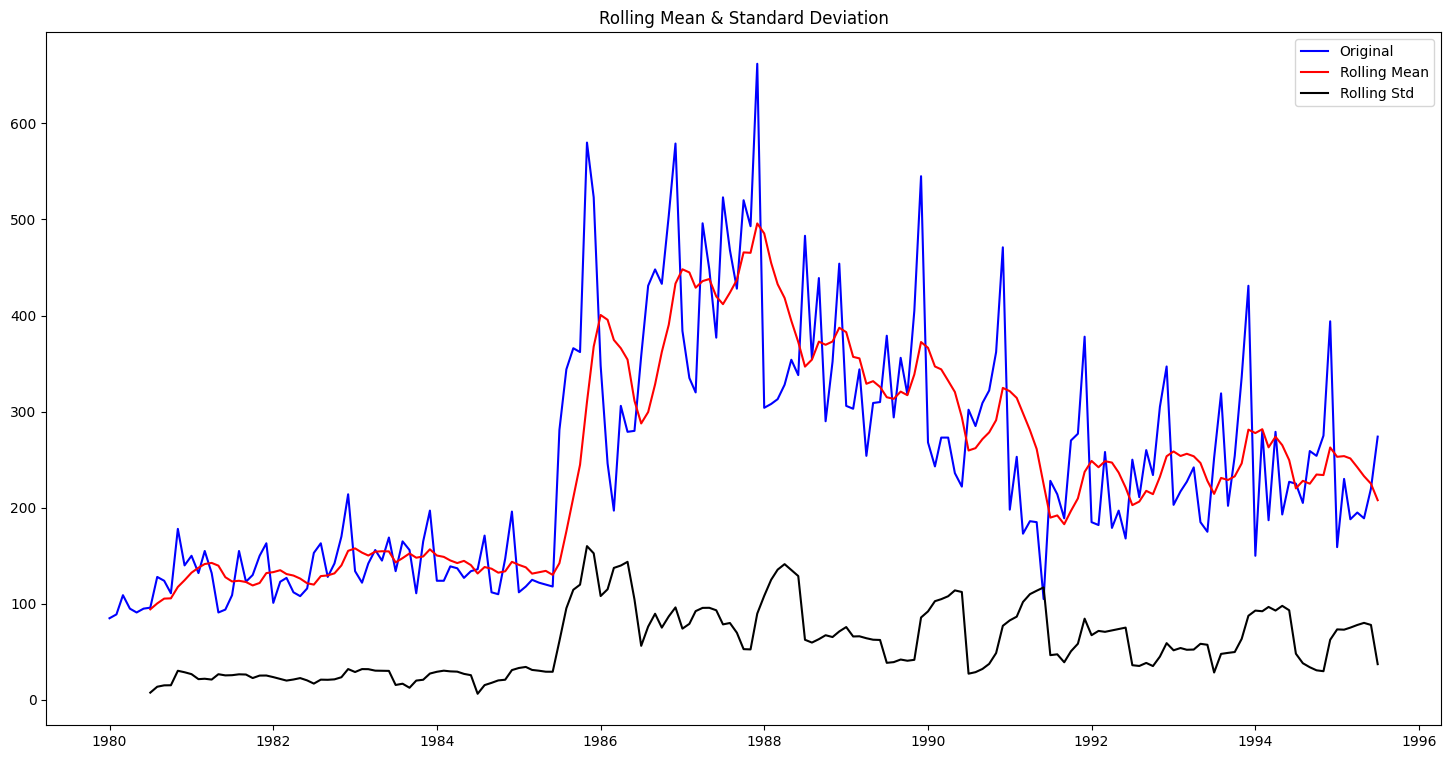

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [97]:
test_stationarity(df['Shoe_Sales'])

*As noticed, the p value is more than 0.05 which means data is non-stationery. *

**Let us take the difference of order 1 and check whether the Time Series is stationary or not.**

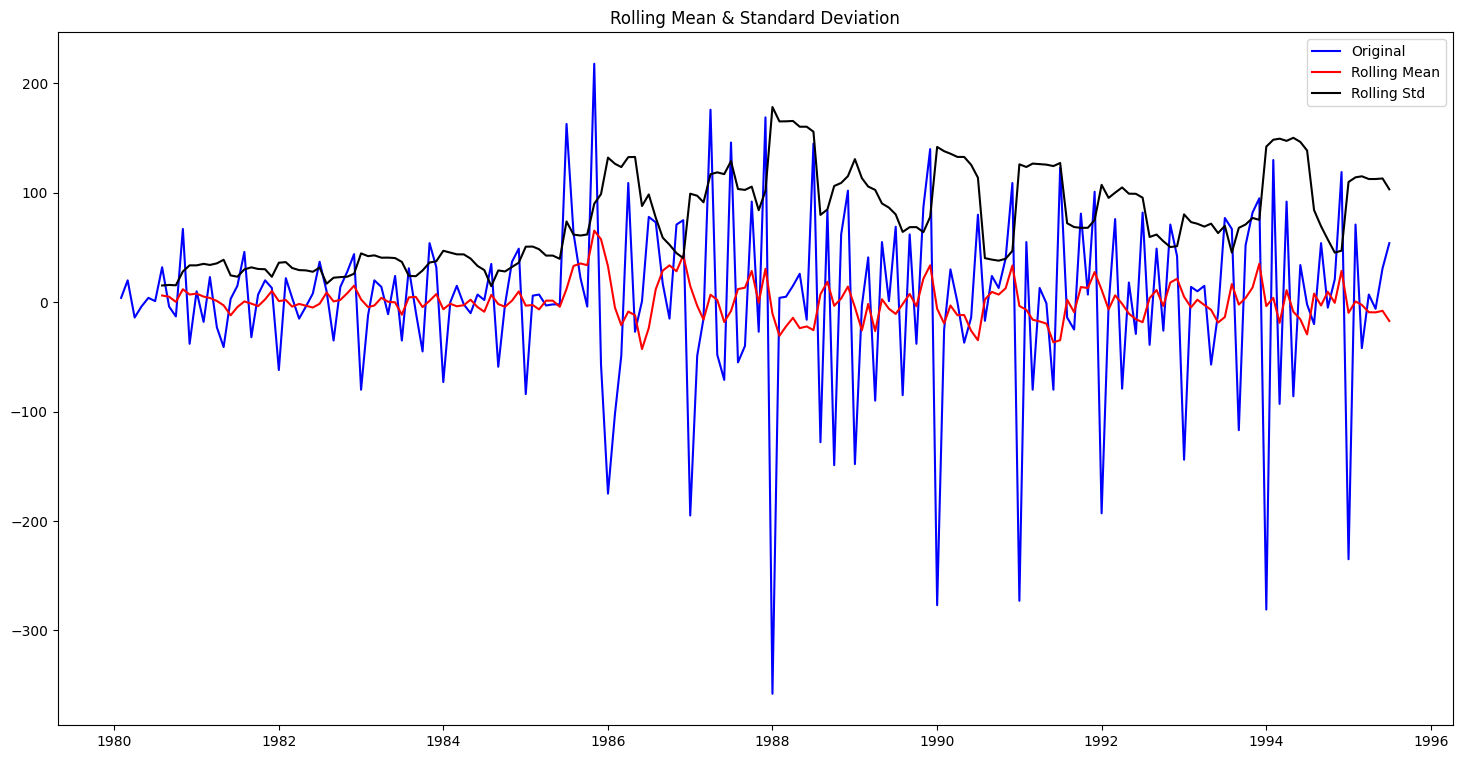

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [98]:
test_stationarity(df['Shoe_Sales'].diff().dropna())

*Now we see that P value  is > than 0.05, this confirms that the Time Series is now stationary.*

**Will plot the Autocorrelation function on the entire data.**

In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

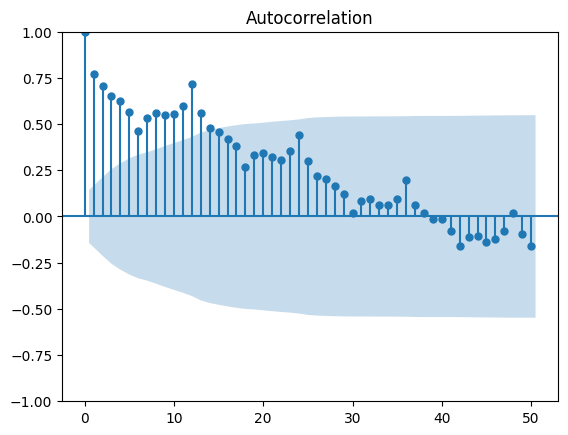

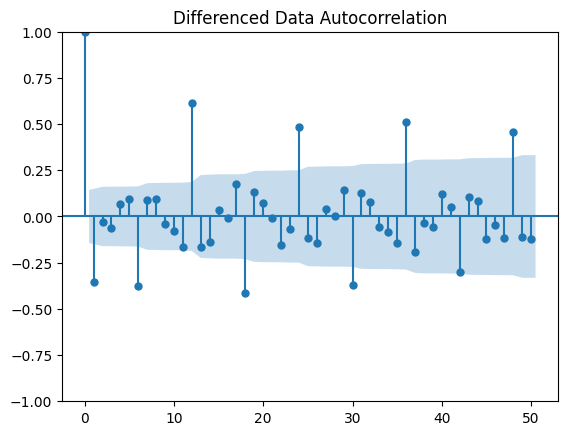

In [100]:

plot_acf(df['Shoe_Sales'],lags=50)
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

The above plots shows the data as staionery as well..


**Will now plot the same on train and test data**

In [101]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [102]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

Last few rows of Training Data


Shoe_Sales
YearMonth             
1990-08-01         285
1990-09-01         309
1990-10-01         322
1990-11-01         362
1990-12-01         471

First few rows of Test Data


Shoe_Sales
YearMonth             
1991-01-01         198
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185

Last few rows of Test Data


Shoe_Sales
YearMonth             
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274

In [103]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Now we will check for stationarity of the Train Data Time Series.

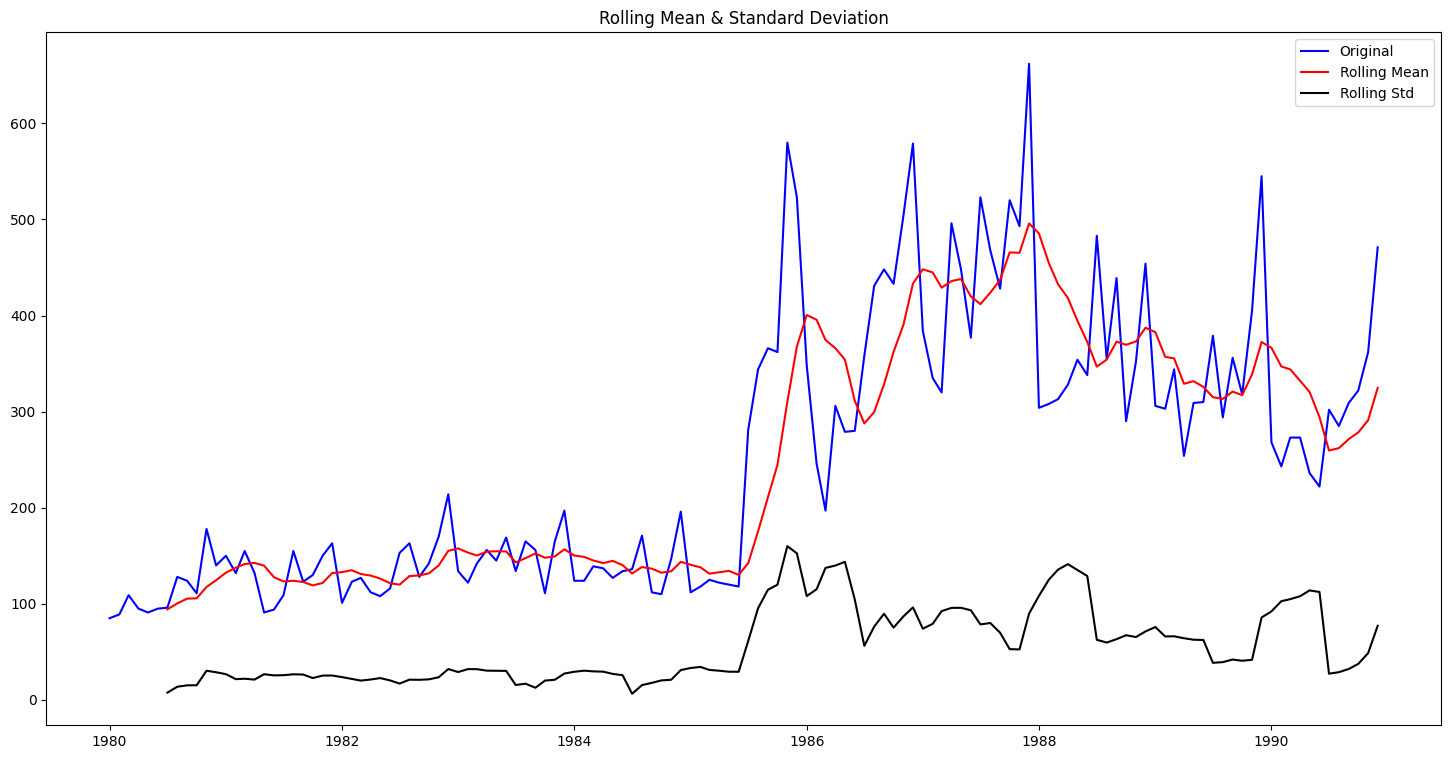

Results of Dickey-Fuller Test:
Test Statistic                  -1.361129
p-value                          0.600763
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [104]:
test_stationarity(train['Shoe_Sales'])

As seen above, the series is not stationary at  𝛼  = 0.05.

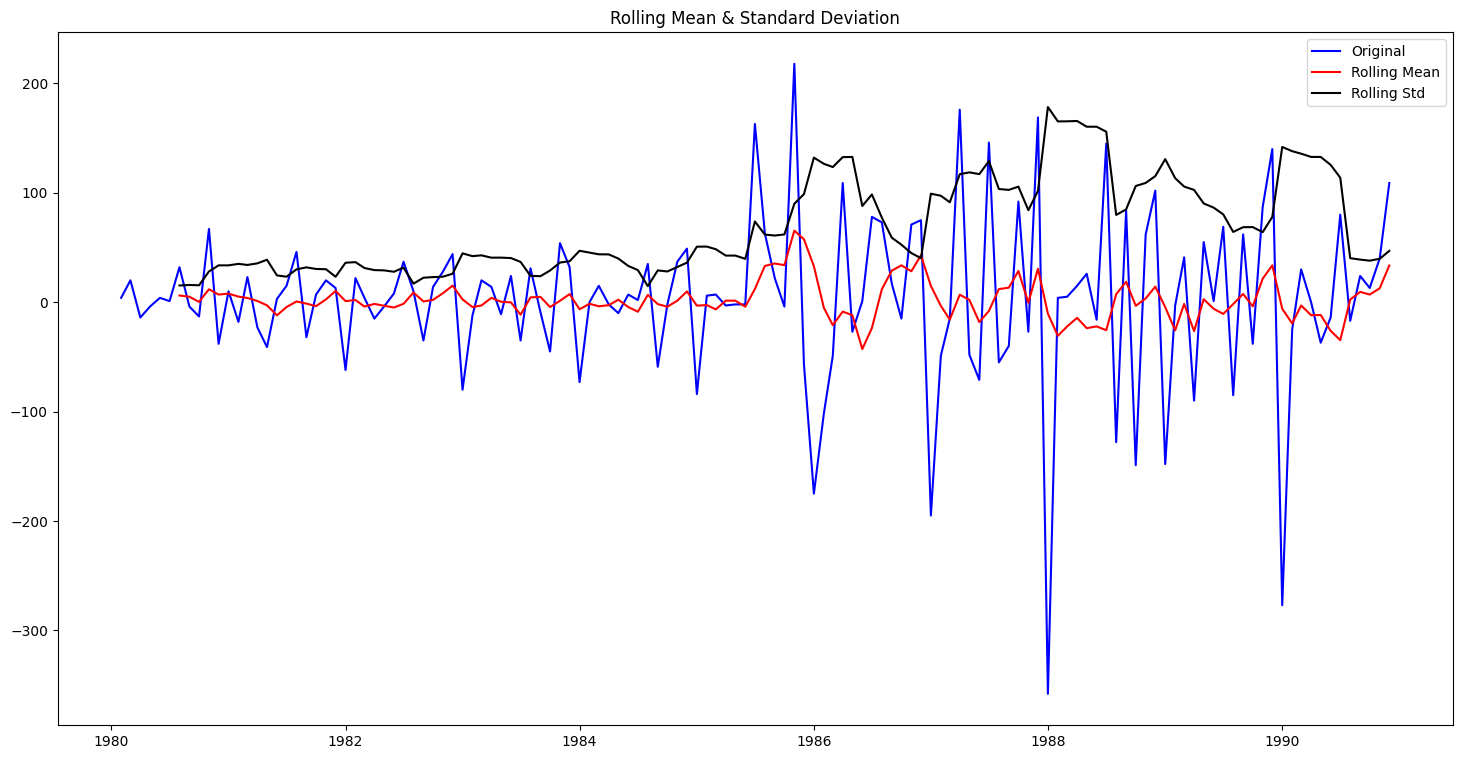

Results of Dickey-Fuller Test:
Test Statistic                  -3.144211
p-value                          0.023450
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [105]:
test_stationarity(train['Shoe_Sales'].diff().dropna())

After taking the difference of order 1,  the series is now stationary at  𝛼  = 0.05.

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Shoe_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [107]:
train.head()

Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91

### Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

As cheked earlier,  will be taking the difference of order 1, as the series is now stationary at 𝛼 = 0.05.

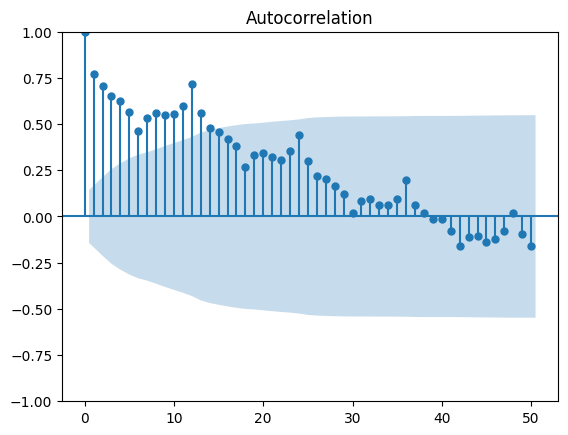

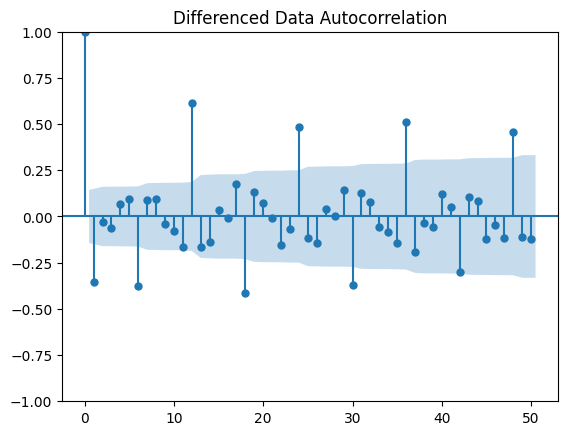

In [108]:
plot_acf(df['Shoe_Sales'],lags=50)
plot_acf(df['Shoe_Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [109]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [110]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [111]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Shoe_Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1508.2837722095962
ARIMA(0, 1, 1) - AIC:1497.050322418789
ARIMA(0, 1, 2) - AIC:1494.9646053663419
ARIMA(1, 1, 0) - AIC:1501.6431242011076


<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC

ARIMA(1, 1, 1) - AIC:1492.4871865078978
ARIMA(1, 1, 2) - AIC:1494.423859457616
ARIMA(2, 1, 0) - AIC:1498.950483025858


<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:1494.431498303535


<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:1496.410739176849


<ipython-input-111-7841719cc352>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [112]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
4  (1, 1, 1)  1492.487187
5  (1, 1, 2)  1494.423859
7  (2, 1, 1)  1494.431498
2  (0, 1, 2)  1494.964605
8  (2, 1, 2)  1496.410739
1  (0, 1, 1)  1497.050322
6  (2, 1, 0)  1498.950483
3  (1, 1, 0)  1501.643124
0  (0, 1, 0)  1508.283772

In [113]:
auto_ARIMA = ARIMA(train['Shoe_Sales'], order=(1,1,1))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -743.244
Date:                Wed, 20 Mar 2024   AIC                           1492.487
Time:                        09:33:30   BIC                           1501.113
Sample:                    01-01-1980   HQIC                          1495.992
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4699      0.111      4.235      0.000       0.252       0.687
ma.L1         -0.8347      0.068    -12.261      0.000      -0.968      -0.701
sigma2      4944.0868    405.583     12.190      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Predict on the Test Set using this model and evaluate the model.**

In [114]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [115]:
from sklearn.metrics import  mean_squared_error
rmse_model7_test_1 = mean_squared_error(test['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
print(rmse_model7_test_1)

142.82073041759352


*The RMSE for this model is 142,820, will check it with all previous models created.*

In [116]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.425508
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        79.699269
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...  102.117637
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...  102.117637
ARIMA(1,1,1)                                        142.820730

## Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

**Setting the seasonality as 6 to estimate parametrs using auto SARIMA model.**

In [117]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [118]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [119]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1426.3361157221577
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1334.5305386143807
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1426.0492095804898


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1385.5711563547761
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1319.6061076038231
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1323.6330116787822


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1322.935808409206


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1312.6718076780385
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1476.016777738224
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1405.2509947832414


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1312.4363431163895
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1414.502823753861


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1363.4568516025213


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1299.1891899949674


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1309.8511217450093


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1311.008603881376


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1288.9756630625009
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:1463.545127212092


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1392.4781652545466


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1302.646703970836
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:1412.2009348575598


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1353.363057526129


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1289.951723057512
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1311.7287331286102


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1312.8458802563655


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1281.026601682622
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:1491.1378318825623
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1420.5381734985742


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1325.9095032128228
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1409.3122061682054


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1377.0115761976006


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1310.8466299286779


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1300.2404493921163


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1301.3601865691453


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1298.6398825664903
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:1471.8669871774296
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1402.466070056048


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1311.5045013583729
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:1401.8751191333934


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1362.3395662757425


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1298.4365411289446


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1301.3122998179024


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1301.93336544517


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1290.6028776789262
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:1463.4445549649004


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1394.0076836420103


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1303.174070720336
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:1403.4501083759226


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1354.1702333053058


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1289.7917484156374


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1302.7369127537643


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1302.9329907229114


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1282.0653716427091
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1477.9194683056446
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1417.7438269694292


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1326.7021571101125
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1396.579577115936


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1367.4598447517983


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1312.4338759911698
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1292.273045311208


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1293.3440973362697


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1290.6034398429615
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:1473.8515321187938
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1404.3796830171036


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1313.0793588661065
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1393.0466753039796


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1364.2168597586865


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1299.4820039530741


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1291.0231111929925


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1291.2761974639923


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1290.4240603013413
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1464.190279382342


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1395.8118187718158


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1304.2162960977341
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1394.9227227207564


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1355.6896077395209


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1290.6681208528937


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1294.3929805371467


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1291.8412746822505


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1280.7786642042702


<ipython-input-119-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [120]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
80  (2, 1, 2)  (2, 0, 2, 6)  1280.778664
26  (0, 1, 2)  (2, 0, 2, 6)  1281.026602
53  (1, 1, 2)  (2, 0, 2, 6)  1282.065372
17  (0, 1, 1)  (2, 0, 2, 6)  1288.975663
50  (1, 1, 2)  (1, 0, 2, 6)  1289.791748

In [121]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -631.389
Date:                           Wed, 20 Mar 2024   AIC                           1280.779
Time:                                   09:34:24   BIC                           1305.561
Sample:                                        0   HQIC                          1290.839
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0600      0.474      0.127      0.899      -0.869       0.989
ar.L2          0.3977      0.161      2.464

**Lets look at plot Diagnostics**

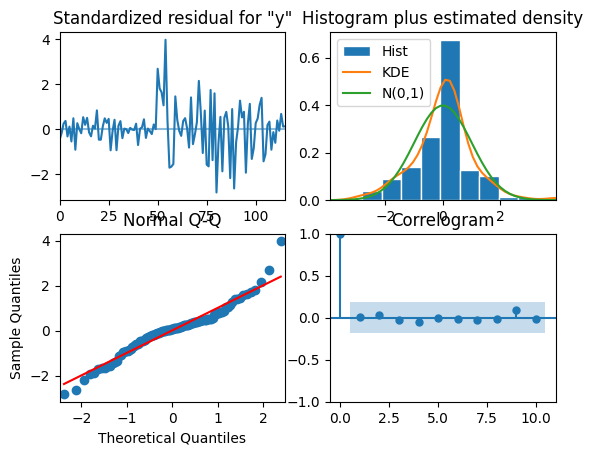

In [122]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

**Predict on the Test Set using this model and evaluate the model.**

In [123]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [124]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  257.242941  55.501930     148.461158     366.024723
1  257.175145  64.584780     130.591302     383.758987
2  265.714593  73.831812     121.006902     410.422285
3  263.007570  78.615013     108.924977     417.090163
4  240.046142  83.309299      76.762917     403.329367

In [125]:
rmse_model8_test_1 = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse_model8_test_1)

57.03093961824393


RMSE has dropped to 57.030..

In [126]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': [rmse_model8_test_1]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.425508
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        79.699269
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...  102.117637
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...  102.117637
ARIMA(1,1,1)                                        142.820730
SARIMA(0,1,2)(2,0,2,6)                               57.030940

As noticed, with 6 months the RMSE for Sarima model has come down to 57.030, will check with 12 months as well..

Setting the seasonality as 12 to estimate parametrs using auto SARIMA model.

In [127]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [128]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [129]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373174


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347135
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.3970510547892
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.586797868651


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.0843995008606
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.06008315672


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.754517442117


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.0396305010788
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738224
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.386120638771


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1185.4842426143903
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1313.573827700332


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1287.7675669260686


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1164.297458535821
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1188.1632556767725


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1188.2091371918907


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1165.8757060515213
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1463.545127212092
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1308.3453006660825


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1177.0247487773704
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1315.5733347402775


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1279.6069439950538


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1156.1654292788921


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1190.066349043642


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1190.0436339224073


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1157.7723133307177
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1491.1378318825623
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1331.405814409209


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1197.560194010957
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1303.2203127538976


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1296.8057138710715


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1173.3867718162398
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1177.1656900229718


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1175.6619338061828


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1175.0815891384905
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1471.8669871774296


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1315.3261912470548


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1186.0030842411998
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1305.195510169827


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1288.679501525873


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1165.179255380758


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1179.1583649870581


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1177.606913991893


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1166.9242913617056
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1463.4445549649004


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1306.7163356175636


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1176.2946238349969
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1306.194694464738


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1280.3994898125343


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1157.0825892924324


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1180.6823652107632


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1179.6027991647832


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1158.7941776853995
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1477.9194683056446
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1331.935319374876


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1199.1019589233922
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1295.218164081891


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1288.6840148345934


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1175.3764824244183
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1169.126967659817


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1167.363977501314


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1166.9191464405833
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1473.8515321187938


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1316.7129215405869


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1185.5196690090577


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1293.3419959529435


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1289.296741061852


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1166.1030148362


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1168.6663425966826


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1168.520870623319


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1167.6766922685827
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1464.190279382342


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1308.2038016389486


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1176.4764240714499


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1293.3977262855767


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1279.6661104289064


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1158.4910015379958


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1169.9627314264155


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1170.0463662104241


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1158.6303256861854


<ipython-input-129-f667f447946f>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [130]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
23  (0, 1, 2)  (1, 0, 2, 12)  1156.165429
50  (1, 1, 2)  (1, 0, 2, 12)  1157.082589
26  (0, 1, 2)  (2, 0, 2, 12)  1157.772313
77  (2, 1, 2)  (1, 0, 2, 12)  1158.491002
80  (2, 1, 2)  (2, 0, 2, 12)  1158.630326

In [131]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -572.083
Date:                            Wed, 20 Mar 2024   AIC                           1156.165
Time:                                    09:35:47   BIC                           1172.032
Sample:                                         0   HQIC                          1162.593
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3742      0.081     -4.632      0.000      -0.533      -0.216
ma.L2          0.0616      0.077   

AIC has dropped to 1156.165 compared to the previous one..

P values with MA-L1, AR.S.L12 looks significant.

**check it on dignostic plot..**

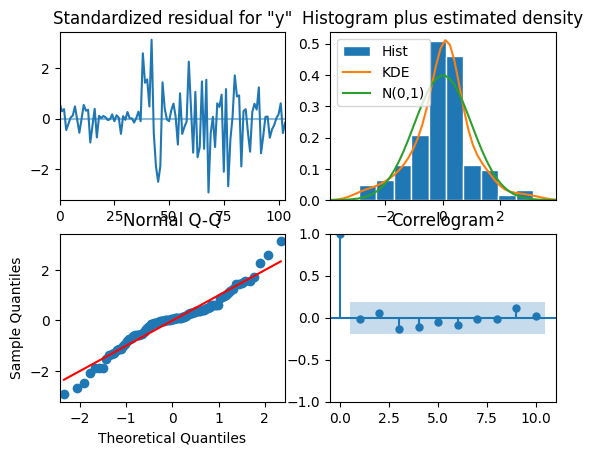

In [132]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [134]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [135]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  225.292051  55.845594     115.836698     334.747403
1  199.179245  65.878245      70.060257     328.298233
2  213.554150  76.229363      64.147343     362.960956
3  238.613113  85.270229      71.486535     405.739691
4  215.720830  93.440578      32.580662     398.860997

In [136]:
rmse_model9_test_1 = mean_squared_error(test['Shoe_Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse_model9_test_1)

69.03063804754328


RMSE score has gone up for this one..

In [137]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': [rmse_model9_test_1]}
                           ,index=['SARIMA(0,1,2)(1,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.425508
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        79.699269
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...  102.117637
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...  102.117637
ARIMA(1,1,1)                                        142.820730
SARIMA(0,1,2)(2,0,2,6)                               57.030940
SARIMA(0,1,2)(1,0,2,12)                              69.030638

AS per the above model analysis, SARIMA with 6 months have given us the best prediction, will go ahead and apply the same with full data.

## Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [138]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': [rmse_model9_test_1]}
                           ,index=['SARIMA(0,1,2)(1,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
RegressionOnTime                                    266.276472
NaiveModel                                          245.121306
SimpleAverageModel                                   63.984570
2pointTrailingMovingAverage                          45.948736
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
9pointTrailingMovingAverage                          67.723648
Alpha=0.605,SimpleExponentialSmoothing              196.425508
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        79.699269
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...  102.117637
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...  102.117637
ARIMA(1,1,1)                                        142.820730
SARIMA(0,1,2)(2,0,2,6)                               57.030940
SARIMA(0,1,2)(1,0,2,12)                              69.030638
SARIMA(0,1,2)(1,0,2,12)                              69.030638

In [139]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                          45.948736
SARIMA(0,1,2)(2,0,2,6)                               57.030940
4pointTrailingMovingAverage                          57.872686
6pointTrailingMovingAverage                          63.456893
SimpleAverageModel                                   63.984570
9pointTrailingMovingAverage                          67.723648
SARIMA(0,1,2)(1,0,2,12)                              69.030638
SARIMA(0,1,2)(1,0,2,12)                              69.030638
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing        79.699269
Alpha=0.605,Beta=0.006,Gamma=0.175,TripleExpone...  102.117637
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...  102.117637
ARIMA(1,1,1)                                        142.820730
Alpha=0.3,SimpleExponentialSmoothing                143.400350
Alpha=0.605,SimpleExponentialSmoothing              196.425508
NaiveModel                                          245.121306
RegressionOnTime                                    266.276472

### 2 Points MA, SARIMA 6, 4points MA, 6points MA, Simple Average Model, SARIMA12 are the ones with lowest RMSE score..

## Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

As per our analysis and RMSE score, it is appropriate to chose SARIMA with 6 & tripleExponential with default alpha to make forecast on full data..

**Building the model on the Full Data with triple exponential Smoothing.**

In [140]:
full_data_model1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.605,
                                                                 smoothing_trend=0.006,
                                                                 smoothing_seasonal=0.175)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [141]:
RMSE_full_data_model1 = metrics.mean_squared_error(df['Shoe_Sales'],full_data_model1.fittedvalues,squared=False)

print('RMSE:',RMSE_full_data_model1)

RMSE: 46.94150208215148


In [142]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = full_data_model1.forecast(steps=12)

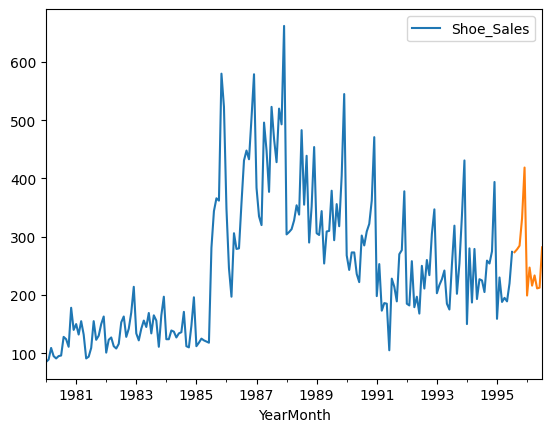

In [143]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [144]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(full_data_model1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(full_data_model1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  181.198825  273.449404  365.699982
1995-09-01  186.081537  278.332115  370.582693
1995-10-01  192.341256  284.591834  376.842413
1995-11-01  239.247067  331.497645  423.748223
1995-12-01  326.548912  418.799490  511.050069

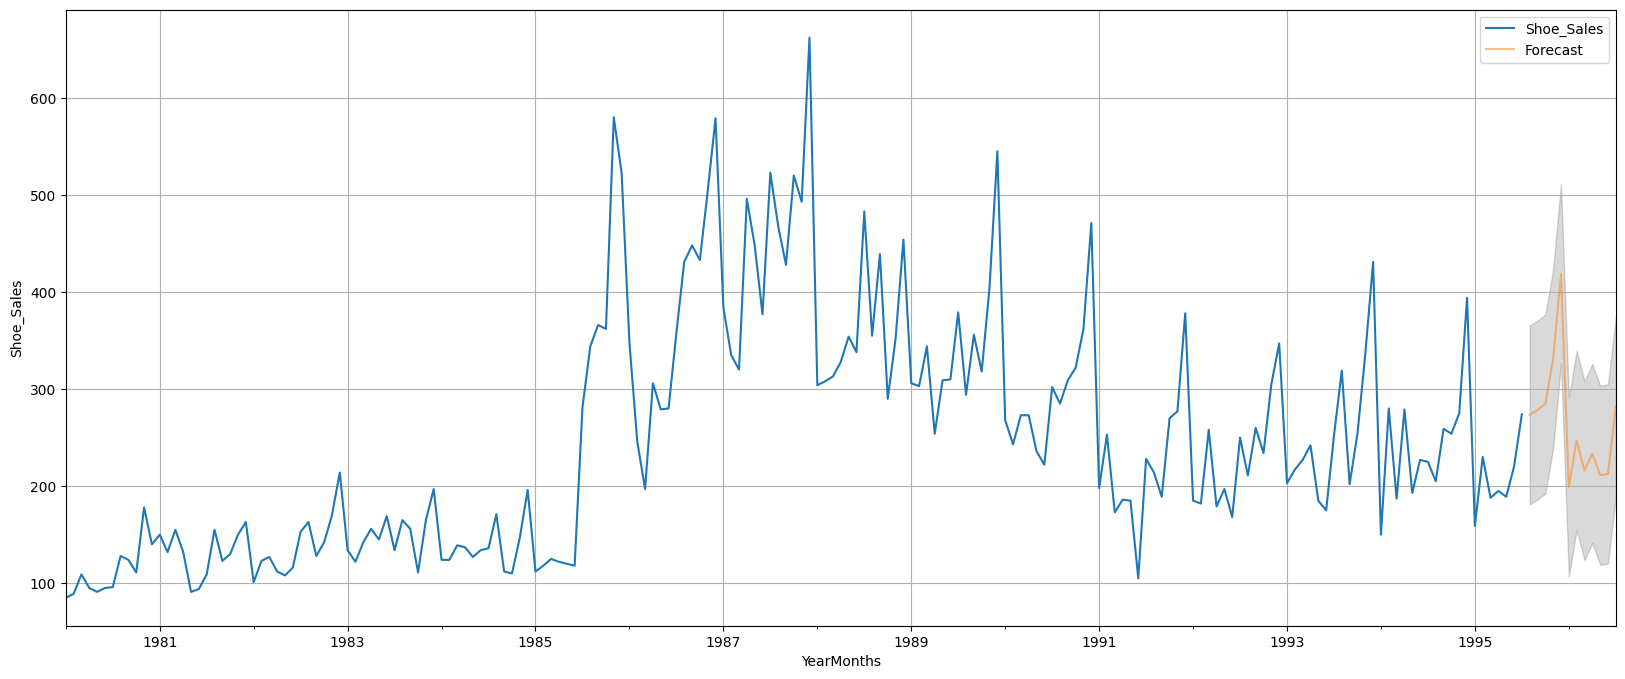

In [145]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(20,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Shoe_Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

**Building the model on the Full Data with SARIMA.**

In [146]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Shoe_Sales'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -923.680
Date:                           Wed, 20 Mar 2024   AIC                           1861.361
Time:                                   09:36:46   BIC                           1883.353
Sample:                               01-01-1980   HQIC                          1870.284
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5014      0.058     -8.588      0.000      -0.616      -0.387
ma.L2          0.0711      0.055      1.299

**Lets look it at Dignostic plot**

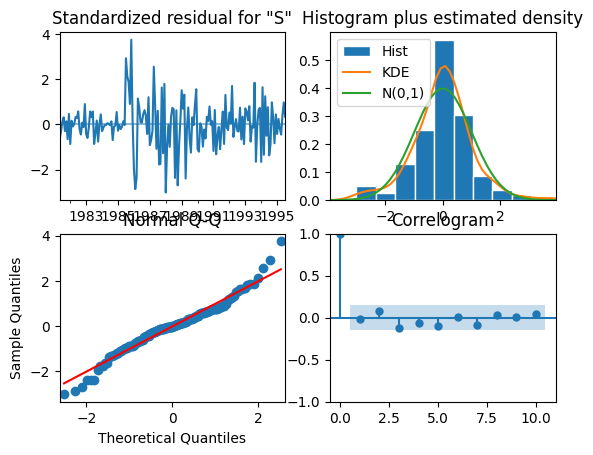

In [147]:
results_full_data_model.plot_diagnostics();

In [148]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [149]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head(12)

Shoe_Sales        mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  250.718788   52.738744     147.352749     354.084826
1995-09-01  263.737118   58.931021     148.234440     379.239797
1995-10-01  269.341350   66.148684     139.692312     398.990388
1995-11-01  315.443376   72.652815     173.046474     457.840277
1995-12-01  397.803142   78.620702     243.709398     551.896886
1996-01-01  193.119649   84.166490      28.156361     358.082937
1996-02-01  246.948394   87.472416      75.505608     418.391180
1996-03-01  216.665331   91.527627      37.274478     396.056183
1996-04-01  234.544595   95.286526      47.786436     421.302754
1996-05-01  208.899270   98.902667      15.053604     402.744936
1996-06-01  215.039676  102.391177      14.356656     415.722696
1996-07-01  271.227667  105.764686      63.932692     478.522642

In [150]:
rmse = mean_squared_error(df['Shoe_Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 51.56757042276814


In [151]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31', freq='M'))

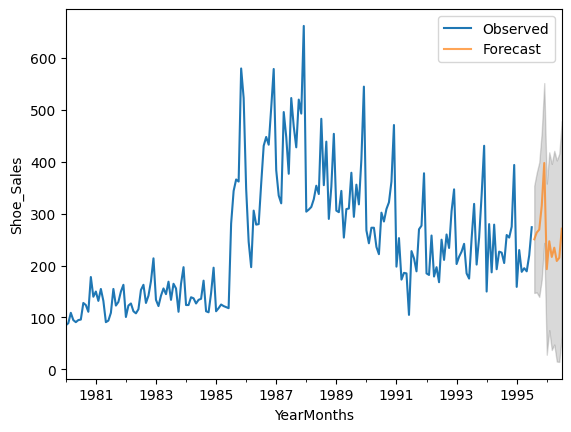

In [152]:
# plot the forecast along with the confidence band

axis = df['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'],
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Shoe_Sales')
plt.legend(loc='best')
plt.show()

Evaluating the model on the full data for & predict next 12 months

### Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Based on the above data and exercise we can conclude the following: -



* There is downward trend of sales after 1988 and remains statble post 1991.
* Highest sales across years is 1987, will have to really analyse the events happened that year which given a spike in to the sales.
* November and December months are highest peak across the years, this must be because of holidays season, where people do lot of shopping.
* There should be strategy for peak season to attact more customers considering the sales forecast and apply the resources accordingly.
* during off season one should plan for maintenance and other important business related activities.
* Contract hire planning can be made based on sales forecast and taking in consideration season and non-season period.
* Further analysis is needed to know the reason for the sharp fall of sale post 1988.

























**END**